<a href="https://colab.research.google.com/github/Robbi1919/Progetto_Esame_ML_2025-2026_Roberto_Morena-/blob/main/Startup_Success_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('student_startup_success_dataset.csv')
print(f"✅ Dataset caricato: {df.shape[0]} righe, {df.shape[1]} colonne")


✅ Dataset caricato: 2100 righe, 16 colonne


In [ ]:
#STEP 2.1 PRIMO SGUAROD
#📊 CELLA 1: Import e Caricamento
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurazione visualizzazioni
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Carica dataset
df = pd.read_csv('student_startup_success_dataset.csv')

print("="*60)
print(" "*20 + "DATASET OVERVIEW")
print("="*60)
print(f"\n📌 Dimensioni: {df.shape[0]} righe × {df.shape[1]} colonne")
print(f"\n📌 Prime 5 righe:\n{df.head()}")
print(f"\n📌 Tipi di dati:\n{df.dtypes}")
print(f"\n📌 Informazioni:\n{df.info()}")


                    DATASET OVERVIEW

📌 Dimensioni: 2100 righe × 16 colonne

📌 Prime 5 righe:
  project_id institution_name institution_type project_domain  team_size  \
0      P0001   Institution_39    Non-technical       AgriTech          3   
1      P0002   Institution_29        Technical        FinTech          4   
2      P0003   Institution_15    Non-technical       AgriTech          3   
3      P0004    Institution_8          Private      GreenTech          7   
4      P0005   Institution_21           Public     HealthTech          7   

   avg_team_experience  innovation_score  funding_amount_usd  \
0                 1.35              0.75            48336.75   
1                 1.57              0.38            30601.34   
2                 2.19              0.61            37712.58   
3                 0.72              0.98            46881.00   
4                 2.64              0.33            29988.37   

   mentorship_support  incubation_support  market_readiness_leve

In [ ]:
#
# ==========================================
# 📊 CELLA 5: ANALISI TARGET VARIABLE
# Step: 2.2.1 - Distribuzione classi- Questo codice crea i grafici bar+pie chart
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# STEP 1: Verifica colonne dataset
print("Colonne disponibili nel dataset:")
print(df.columns.tolist())
print(f"\nDataset shape: {df.shape}")

# STEP 2: Conta frequenze classe target
target_counts = df['success_label'].value_counts()
print("\n" + "="*60)
print("DISTRIBUZIONE TARGET VARIABLE")
print("="*60)
print(target_counts)
print(f"\nPercentuali:")
print(df['success_label'].value_counts(normalize=True) * 100)

# STEP 3: Calcola imbalance ratio
count_0 = target_counts[0]
count_1 = target_counts[1]
imbalance_ratio = count_0 / count_1
print(f"\n{'─'*60}")
print(f"Imbalance Ratio: {imbalance_ratio:.2f}:1")
print(f"(Classe 0 / Classe 1 = {count_0} / {count_1})")
print(f"{'─'*60}")


Colonne disponibili nel dataset:
['project_id', 'institution_name', 'institution_type', 'project_domain', 'team_size', 'avg_team_experience', 'innovation_score', 'funding_amount_usd', 'mentorship_support', 'incubation_support', 'market_readiness_level', 'competition_awards', 'business_model_score', 'technology_maturity', 'year', 'success_label']

Dataset shape: (2100, 16)

DISTRIBUZIONE TARGET VARIABLE
success_label
0    1219
1     881
Name: count, dtype: int64

Percentuali:
success_label
0    58.047619
1    41.952381
Name: proportion, dtype: float64

────────────────────────────────────────────────────────────
Imbalance Ratio: 1.38:1
(Classe 0 / Classe 1 = 1219 / 881)
────────────────────────────────────────────────────────────


✅ Grafico salvato: 04_target_distribution.png


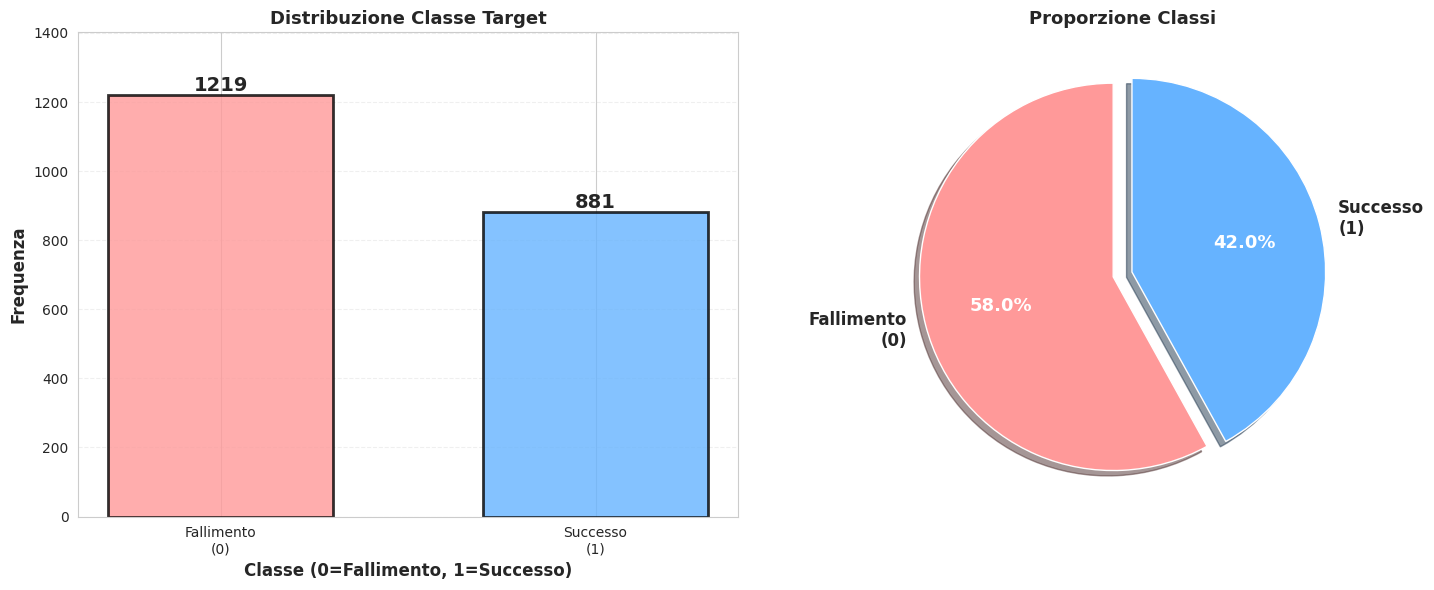

In [ ]:
# ==========================================
# 📊 CELLA 6: VISUALIZZAZIONE TARGET
# Step: 2.2.2 - Grafici distribuzione
# ==========================================

# Preparazione dati
class_names = ['Fallimento\n(0)', 'Successo\n(1)']
class_counts = [count_0, count_1]
class_percentages = [58.0, 42.0]  # Arrotondato ai dati reali
colors = ['#ff9999', '#66b3ff']  # Rosso fallimenti, Blu successi

# FIGURA: 2 grafici side-by-side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# GRAFICO 1: Bar chart verticale
ax1 = axes[0]
bars = ax1.bar(class_names, class_counts, color=colors, edgecolor='black',
               linewidth=2, width=0.6, alpha=0.8)

# Aggiungi etichette numeri sopra le barre
for bar, count in zip(bars, class_counts):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(count)}',
            ha='center', va='bottom', fontsize=14, fontweight='bold')

ax1.set_ylabel('Frequenza', fontsize=12, fontweight='bold')
ax1.set_xlabel('Classe (0=Fallimento, 1=Successo)', fontsize=12, fontweight='bold')
ax1.set_title('Distribuzione Classe Target', fontsize=13, fontweight='bold')
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_ylim(0, max(class_counts) * 1.15)

# GRAFICO 2: Pie chart
ax2 = axes[1]
wedges, texts, autotexts = ax2.pie(class_counts, labels=class_names, autopct='%1.1f%%',
                                     colors=colors, startangle=90,
                                     textprops={'fontsize': 12, 'fontweight': 'bold'},
                                     explode=(0.05, 0.05),
                                     shadow=True)

# Formatta percentuali
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(13)
    autotext.set_fontweight('bold')

ax2.set_title('Proporzione Classi', fontsize=13, fontweight='bold')

# Layout e salvataggio
plt.tight_layout()
plt.savefig('04_target_distribution.png', dpi=300, bbox_inches='tight')
print("✅ Grafico salvato: 04_target_distribution.png")
plt.show()


In [ ]:
# ==========================================
# 📊 CELLA 9: ANALISI MISSING VALUES
# Step: 2.3.1 - Identificazione valori mancanti
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*70)
print(" "*15 + "ANALISI MISSING VALUES")
print("="*70)

# STEP 1: Conta missing values per colonna
missing_count = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

# STEP 2: Crea tabella riepilogativa
missing_df = pd.DataFrame({
    'Colonna': df.columns,
    'Missing_Count': missing_count.values,
    'Missing_Percent': missing_percent.values,
    'Tipo_Dato': df.dtypes.values
})

# STEP 3: Filtra solo colonne con missing
missing_df_filtered = missing_df[missing_df['Missing_Count'] > 0].sort_values(
    'Missing_Count', ascending=False
)

print(f"\n📊 TOTALE COLONNE: {len(df.columns)}")
print(f"📊 COLONNE CON MISSING: {len(missing_df_filtered)}")
print(f"📊 TOTALE MISSING VALUES: {missing_count.sum()}")

if len(missing_df_filtered) > 0:
    print(f"\n{'─'*70}")
    print("DETTAGLIO MISSING VALUES PER COLONNA:")
    print(f"{'─'*70}")
    print(missing_df_filtered.to_string(index=False))
else:
    print(f"\n✅ ECCELLENTE: Nessun missing value rilevato nel dataset!")
    print(f"   Il dataset è completo e pronto per l'analisi.")

print(f"\n{'─'*70}")



               ANALISI MISSING VALUES

📊 TOTALE COLONNE: 16
📊 COLONNE CON MISSING: 0
📊 TOTALE MISSING VALUES: 0

✅ ECCELLENTE: Nessun missing value rilevato nel dataset!
   Il dataset è completo e pronto per l'analisi.

──────────────────────────────────────────────────────────────────────


✅ Grafico salvato: 05_missing_values_analysis.png


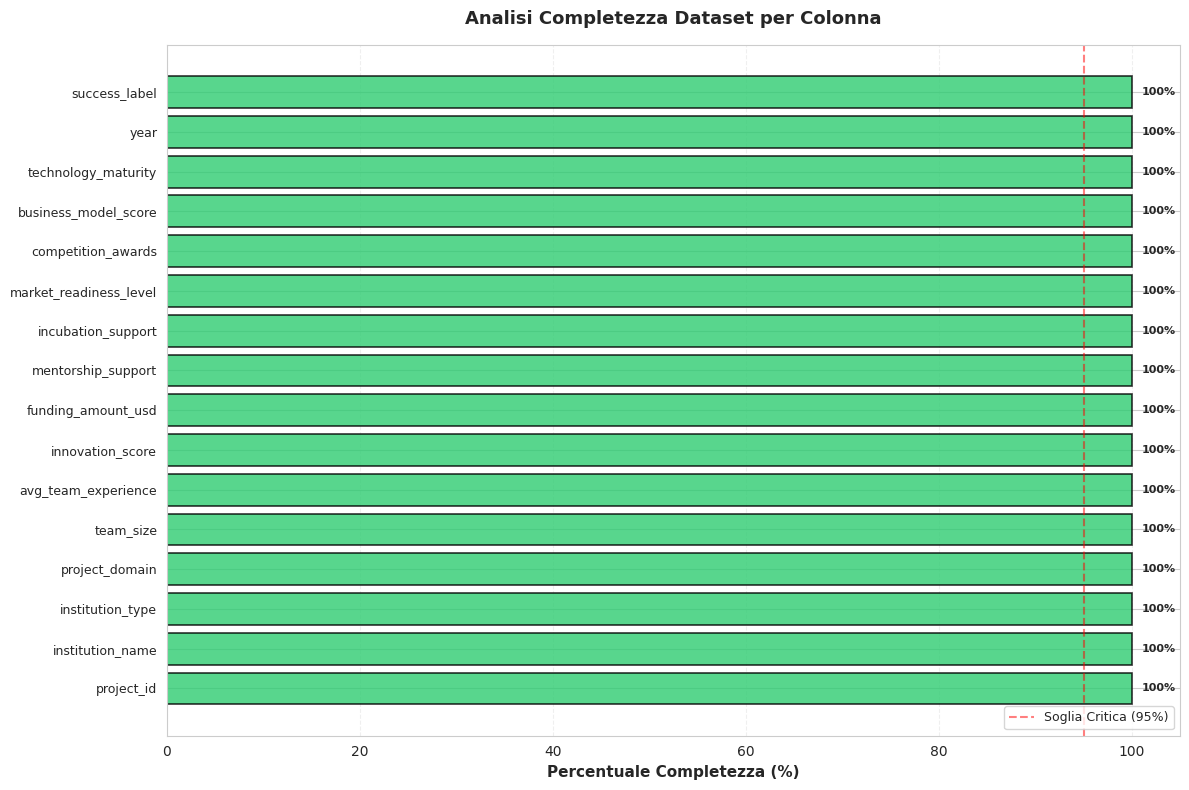

In [ ]:
# ==========================================
# 📊 CELLA 10: VISUALIZZAZIONE MISSING
# Step: 2.3.2 - Grafico completezza dataset
# ==========================================

# Preparazione dati per visualizzazione
missing_summary = pd.DataFrame({
    'Colonna': df.columns,
    'Missing_Percent': (df.isnull().sum() / len(df) * 100).values,
    'Complete_Percent': ((len(df) - df.isnull().sum()) / len(df) * 100).values
})

# Ordina per percentuale missing (decrescente)
missing_summary = missing_summary.sort_values('Missing_Percent', ascending=False)

# GRAFICO: Bar chart orizzontale con percentuali completezza
fig, ax = plt.subplots(figsize=(12, 8))

# Crea bar chart
y_pos = np.arange(len(missing_summary))
colors = ['#2ecc71' if x == 0 else '#e74c3c' for x in missing_summary['Missing_Percent']]

bars = ax.barh(y_pos, missing_summary['Complete_Percent'],
               color=colors, edgecolor='black', linewidth=1.2, alpha=0.8)

# Etichette
ax.set_yticks(y_pos)
ax.set_yticklabels(missing_summary['Colonna'], fontsize=9)
ax.set_xlabel('Percentuale Completezza (%)', fontsize=11, fontweight='bold')
ax.set_title('Analisi Completezza Dataset per Colonna',
             fontsize=13, fontweight='bold', pad=15)
ax.set_xlim(0, 105)

# Aggiungi percentuali sulle barre
for i, (bar, pct) in enumerate(zip(bars, missing_summary['Complete_Percent'])):
    width = bar.get_width()
    missing_pct = missing_summary['Missing_Percent'].iloc[i]

    if missing_pct > 0:
        label = f'{pct:.1f}% (Missing: {missing_pct:.1f}%)'
    else:
        label = f'{pct:.0f}%'

    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            label, ha='left', va='center', fontsize=8, fontweight='bold')

# Griglia
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.axvline(x=95, color='red', linestyle='--', linewidth=1.5, alpha=0.5,
           label='Soglia Critica (95%)')
ax.legend(loc='lower right', fontsize=9)

# Layout
plt.tight_layout()
plt.savefig('05_missing_values_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Grafico salvato: 05_missing_values_analysis.png")
plt.show()



In [ ]:
# ==========================================
# 📊 CELLA 11: STRATEGIA MISSING VALUES
# Step: 2.3.3 - Decisione e documentazione
# ==========================================

print("\n" + "="*70)
print(" "*15 + "DECISIONE STRATEGICA MISSING VALUES")
print("="*70)

# Analisi situazione
n_missing = df.isnull().sum().sum()
n_total_cells = df.shape[0] * df.shape[1]
missing_rate = (n_missing / n_total_cells) * 100

print(f"\n📊 RIEPILOGO SITUAZIONE:")
print(f"   Totale celle dataset: {n_total_cells:,}")
print(f"   Celle con missing: {n_missing}")
print(f"   Percentuale missing: {missing_rate:.4f}%")

print(f"\n✅ DECISIONE:")
if n_missing == 0:
    print(f"   NESSUNA AZIONE NECESSARIA")
    print(f"   Il dataset non presenta valori mancanti.")
    print(f"   Tutti i 2,100 record sono completi.")
    print(f"\n💡 VANTAGGIO:")
    print(f"   - Nessuna distorsione da imputazione")
    print(f"   - Nessuna perdita di informazione")
    print(f"   - Massima affidabilità dati")
else:
    print(f"   RICHIESTA IMPUTAZIONE")
    cols_with_missing = df.columns[df.isnull().any()].tolist()
    print(f"   Colonne da trattare: {', '.join(cols_with_missing)}")

print(f"\n📋 STRATEGIE DI IMPUTAZIONE (teoriche):")
print(f"   1. NUMERICHE CONTINUE → Media/Mediana (robusta a outliers)")
print(f"   2. NUMERICHE DISCRETE → Moda (valore più frequente)")
print(f"   3. CATEGORICHE → Moda o nuova categoria 'Unknown'")
print(f"   4. BINARIE → Moda")
print(f"   5. ELIMINAZIONE → Se missing >30% della colonna o <5% righe")

print(f"\n✅ STEP 2.3 COMPLETATO!")
print("="*70)



               DECISIONE STRATEGICA MISSING VALUES

📊 RIEPILOGO SITUAZIONE:
   Totale celle dataset: 33,600
   Celle con missing: 0
   Percentuale missing: 0.0000%

✅ DECISIONE:
   NESSUNA AZIONE NECESSARIA
   Il dataset non presenta valori mancanti.
   Tutti i 2,100 record sono completi.

💡 VANTAGGIO:
   - Nessuna distorsione da imputazione
   - Nessuna perdita di informazione
   - Massima affidabilità dati

📋 STRATEGIE DI IMPUTAZIONE (teoriche):
   1. NUMERICHE CONTINUE → Media/Mediana (robusta a outliers)
   2. NUMERICHE DISCRETE → Moda (valore più frequente)
   3. CATEGORICHE → Moda o nuova categoria 'Unknown'
   4. BINARIE → Moda
   5. ELIMINAZIONE → Se missing >30% della colonna o <5% righe

✅ STEP 2.3 COMPLETATO!


In [ ]:
# ==========================================
# 📊 CELLA 12: IDENTIFICAZIONE FEATURES NUMERICHE
# Step: 2.4.1 - Separazione numeriche da categoriche
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*70)
print(" "*15 + "IDENTIFICAZIONE FEATURES NUMERICHE")
print("="*70)

# STEP 1: Identifica colonne numeriche (escludi target e ID)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Rimuovi project_id (se presente) e success_label (target)
exclude_cols = ['project_id', 'success_label']
numeric_features = [col for col in numeric_cols if col not in exclude_cols]

# STEP 2: Identifica colonne categoriche
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols += [col for col in df.columns if col in exclude_cols and col != 'success_label']

print(f"\n📊 CLASSIFICAZIONE FEATURES:")
print(f"   Totale features: {len(df.columns)}")
print(f"   Features numeriche: {len(numeric_features)}")
print(f"   Features categoriche: {len(categorical_cols) - 1}")  # -1 per escludere target
print(f"   Target variable: 1 (success_label)")

print(f"\n📊 FEATURES NUMERICHE DA ANALIZZARE:")
for i, col in enumerate(numeric_features, 1):
    print(f"   {i}. {col}")

print(f"\n📊 FEATURES CATEGORICHE:")
cat_features = [col for col in categorical_cols if col not in exclude_cols]
for i, col in enumerate(cat_features, 1):
    print(f"   {i}. {col}")

print("\n" + "="*70)



               IDENTIFICAZIONE FEATURES NUMERICHE

📊 CLASSIFICAZIONE FEATURES:
   Totale features: 16
   Features numeriche: 11
   Features categoriche: 4
   Target variable: 1 (success_label)

📊 FEATURES NUMERICHE DA ANALIZZARE:
   1. team_size
   2. avg_team_experience
   3. innovation_score
   4. funding_amount_usd
   5. mentorship_support
   6. incubation_support
   7. market_readiness_level
   8. competition_awards
   9. business_model_score
   10. technology_maturity
   11. year

📊 FEATURES CATEGORICHE:
   1. institution_name
   2. institution_type
   3. project_domain



In [ ]:
# ==========================================
# 📊 CELLA 13: STATISTICHE DESCRITTIVE
# Step: 2.4.2 - Analisi statistica features numeriche
# ==========================================

print("\n" + "="*70)
print(" "*15 + "STATISTICHE DESCRITTIVE FEATURES NUMERICHE")
print("="*70)

# STEP 1: Calcola statistiche descrittive complete
stats = df[numeric_features].describe().T

# Aggiungi statistiche aggiuntive
stats['missing'] = df[numeric_features].isnull().sum()
stats['skewness'] = df[numeric_features].skew()
stats['kurtosis'] = df[numeric_features].kurtosis()

# Riordina colonne per leggibilità
stats = stats[['count', 'missing', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'skewness', 'kurtosis']]

print("\n📊 TABELLA STATISTICHE COMPLETE:")
print("─"*140)
print(stats.round(2).to_string())
print("─"*140)

# STEP 2: Interpretazione skewness
print(f"\n📊 ANALISI ASIMMETRIA (Skewness):")
print(f"   Skewness interpretazione:")
print(f"   • |skew| < 0.5  → Simmetrica (distribuita normalmente)")
print(f"   • 0.5 ≤ |skew| < 1.0 → Moderatamente asimmetrica")
print(f"   • |skew| ≥ 1.0 → Fortemente asimmetrica (trasformazione raccomandata)")
print(f"\n   Classificazione features:")

for col in numeric_features:
    skew_val = df[col].skew()
    if abs(skew_val) < 0.5:
        category = "✅ SIMMETRICA"
    elif abs(skew_val) < 1.0:
        category = "⚠️ MODERATA"
    else:
        category = "🔴 FORTE (log transform raccomandato)"
    print(f"   {col:30s} skew={skew_val:6.2f} → {category}")

print("\n" + "="*70)



               STATISTICHE DESCRITTIVE FEATURES NUMERICHE

📊 TABELLA STATISTICHE COMPLETE:
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                         count  missing      mean       std      min       25%       50%       75%       max  skewness  kurtosis
team_size               2100.0        0      4.47      1.71     2.00      3.00      4.00      6.00      7.00      0.03     -1.30
avg_team_experience     2100.0        0      2.27      1.00     0.50      1.44      2.29      3.12      4.00     -0.06     -1.18
innovation_score        2100.0        0      0.65      0.20     0.30      0.48      0.65      0.83      1.00     -0.02     -1.20
funding_amount_usd      2100.0        0  25372.47  14141.82  1050.09  13532.47  25216.43  37403.67  49982.15     -0.00     -1.18
mentorship_support      2100.0        0      0.49      0.50     0.00      0.00      0.00      1.00      1.00      0.02    


📊 Creazione istogrammi distribuzioni...
✅ Grafico salvato: 06_numeric_distributions.png


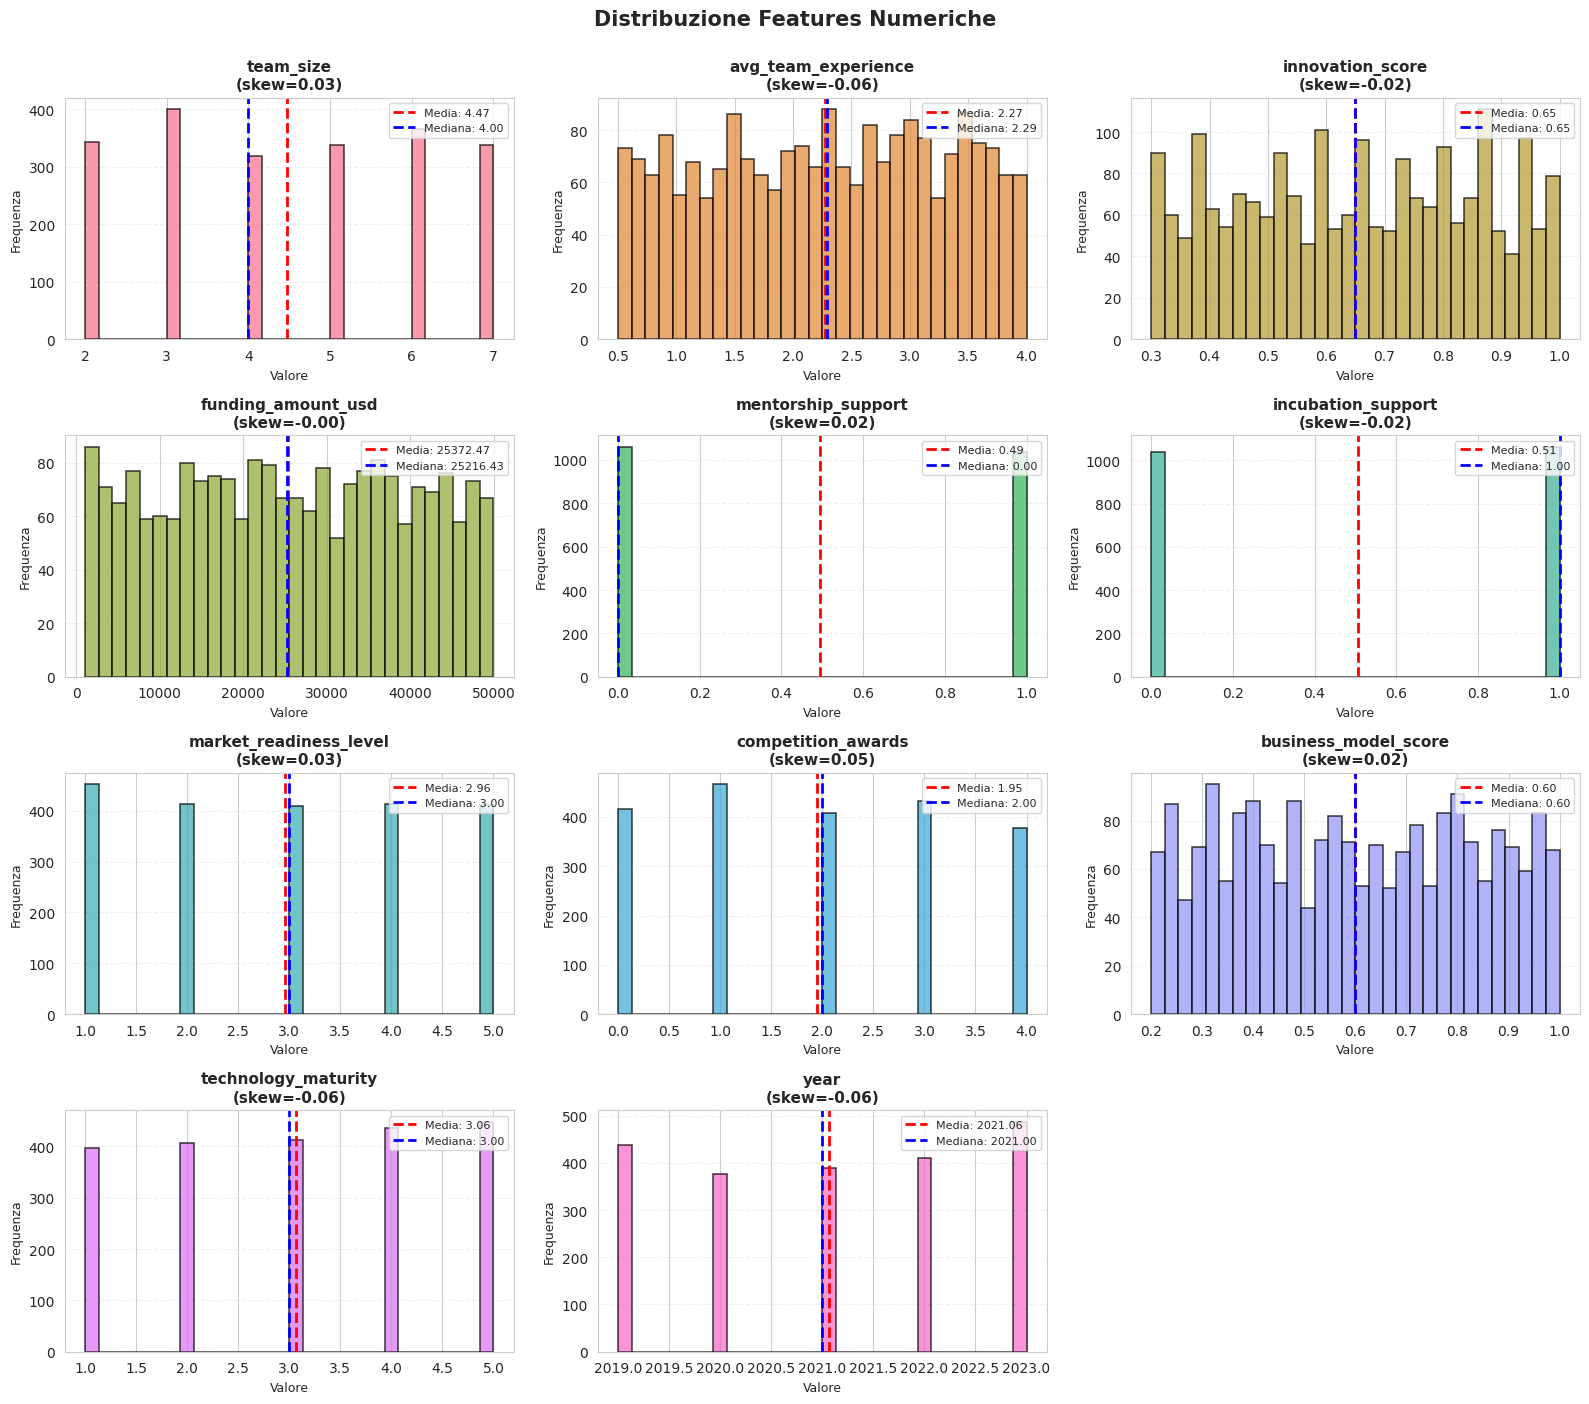


✅ Istogrammi creati per 11 features numeriche


In [ ]:
# ==========================================
# 📊 CELLA 14: ISTOGRAMMI DISTRIBUZIONI
# Step: 2.4.3 - Visualizzazione distribuzioni
# ==========================================

print("\n📊 Creazione istogrammi distribuzioni...")

# Numero di features
n_features = len(numeric_features)
n_cols = 3
n_rows = int(np.ceil(n_features / n_cols))

# Crea figura con subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3.5))
axes = axes.flatten()

# Palette colori
colors = sns.color_palette("husl", n_features)

# Plot histogram per ogni feature
for idx, col in enumerate(numeric_features):
    ax = axes[idx]

    # Histogram + KDE
    data = df[col].dropna()
    ax.hist(data, bins=30, color=colors[idx], alpha=0.7, edgecolor='black', linewidth=1.2)

    # Linea media
    mean_val = data.mean()
    median_val = data.median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.2f}')
    ax.axvline(median_val, color='blue', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.2f}')

    # Titolo e labels
    ax.set_title(f'{col}\n(skew={df[col].skew():.2f})', fontsize=11, fontweight='bold')
    ax.set_xlabel('Valore', fontsize=9)
    ax.set_ylabel('Frequenza', fontsize=9)
    ax.legend(fontsize=8, loc='upper right')
    ax.grid(axis='y', alpha=0.3, linestyle='--')

# Rimuovi subplot vuoti
for idx in range(n_features, len(axes)):
    fig.delaxes(axes[idx])

# Layout e salvataggio
plt.suptitle('Distribuzione Features Numeriche', fontsize=15, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('06_numeric_distributions.png', dpi=300, bbox_inches='tight')
print("✅ Grafico salvato: 06_numeric_distributions.png")
plt.show()

print(f"\n✅ Istogrammi creati per {n_features} features numeriche")



📊 Creazione boxplots per rilevamento outliers...
✅ Grafico salvato: 07_numeric_boxplots.png


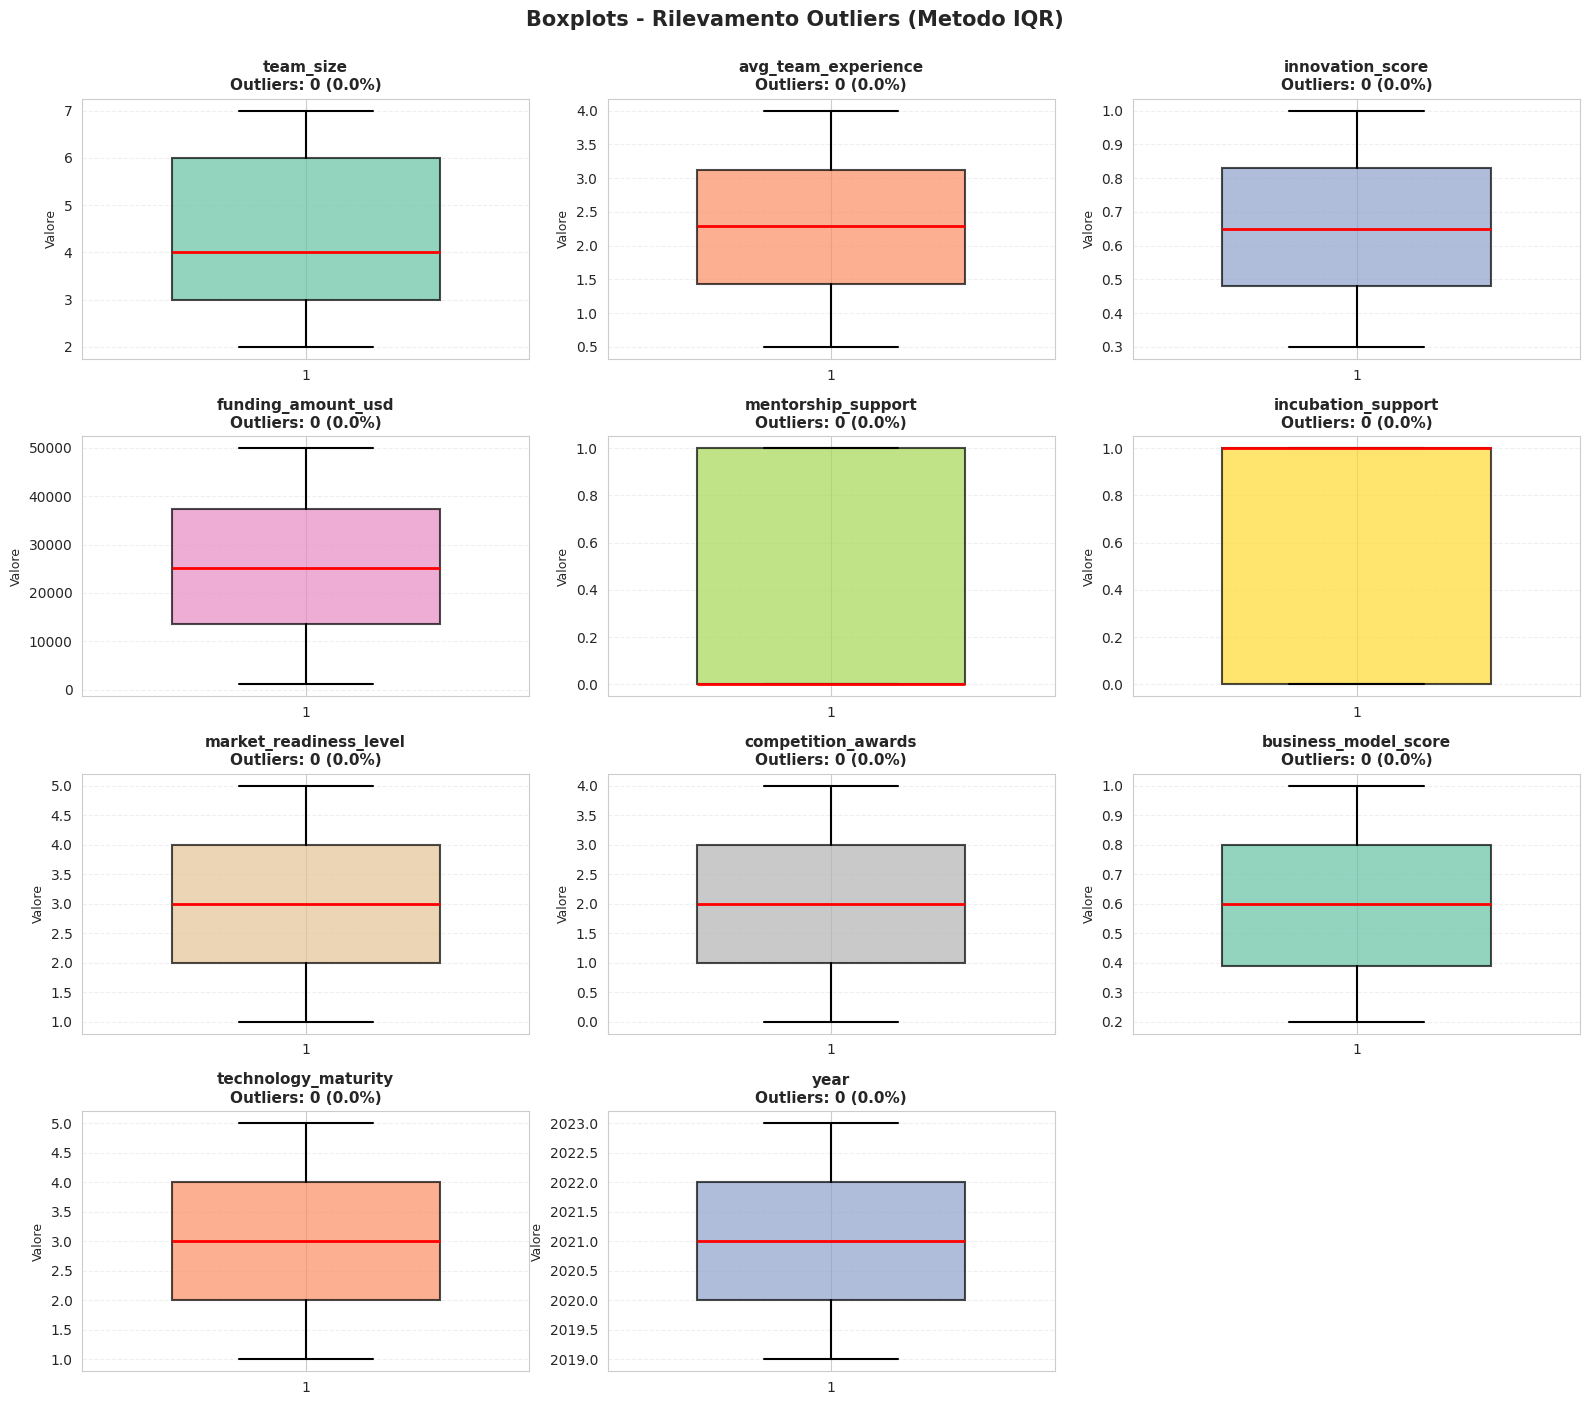


               RIEPILOGO OUTLIERS (Metodo IQR)
               Feature  N_Outliers  Outlier_%  Lower_Bound  Upper_Bound
             team_size           0        0.0     -1.50000     10.50000
   avg_team_experience           0        0.0     -1.08625      5.64375
      innovation_score           0        0.0     -0.04500      1.35500
    funding_amount_usd           0        0.0 -22274.32375  73210.46625
    mentorship_support           0        0.0     -1.50000      2.50000
    incubation_support           0        0.0     -1.50000      2.50000
market_readiness_level           0        0.0     -1.00000      7.00000
    competition_awards           0        0.0     -2.00000      6.00000
  business_model_score           0        0.0     -0.22500      1.41500
   technology_maturity           0        0.0     -1.00000      7.00000
                  year           0        0.0   2017.00000   2025.00000

📊 INTERPRETAZIONE:
   Metodo IQR: Outlier = valore < Q1-1.5×IQR o > Q3+1.5×IQR
   Outli

In [ ]:
# ==========================================
# 📊 CELLA 15: BOXPLOTS OUTLIER DETECTION
# Step: 2.4.4 - Identificazione outliers
# ==========================================

print("\n📊 Creazione boxplots per rilevamento outliers...")

# Crea figura con subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3.5))
axes = axes.flatten()

# Palette colori
colors_box = sns.color_palette("Set2", n_features)

# Plot boxplot per ogni feature
outlier_summary = []

for idx, col in enumerate(numeric_features):
    ax = axes[idx]
    data = df[col].dropna()

    # Calcola outliers con metodo IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data < lower_bound) | (data > upper_bound)]
    n_outliers = len(outliers)
    outlier_pct = (n_outliers / len(data)) * 100

    outlier_summary.append({
        'Feature': col,
        'N_Outliers': n_outliers,
        'Outlier_%': outlier_pct,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound
    })

    # Boxplot
    bp = ax.boxplot(data, vert=True, patch_artist=True, widths=0.6,
                    boxprops=dict(facecolor=colors_box[idx], alpha=0.7, edgecolor='black', linewidth=1.5),
                    whiskerprops=dict(color='black', linewidth=1.5),
                    capprops=dict(color='black', linewidth=1.5),
                    medianprops=dict(color='red', linewidth=2),
                    flierprops=dict(marker='o', markerfacecolor='red', markersize=6, alpha=0.6))

    # Titolo e labels
    ax.set_title(f'{col}\nOutliers: {n_outliers} ({outlier_pct:.1f}%)',
                 fontsize=11, fontweight='bold')
    ax.set_ylabel('Valore', fontsize=9)
    ax.grid(axis='y', alpha=0.3, linestyle='--')

# Rimuovi subplot vuoti
for idx in range(n_features, len(axes)):
    fig.delaxes(axes[idx])

# Layout e salvataggio
plt.suptitle('Boxplots - Rilevamento Outliers (Metodo IQR)',
             fontsize=15, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('07_numeric_boxplots.png', dpi=300, bbox_inches='tight')
print("✅ Grafico salvato: 07_numeric_boxplots.png")
plt.show()

# STEP 2: Tabella riepilogativa outliers
outlier_df = pd.DataFrame(outlier_summary)
outlier_df = outlier_df.sort_values('N_Outliers', ascending=False)

print("\n" + "="*70)
print(" "*15 + "RIEPILOGO OUTLIERS (Metodo IQR)")
print("="*70)
print(outlier_df.to_string(index=False))
print("="*70)

print(f"\n📊 INTERPRETAZIONE:")
print(f"   Metodo IQR: Outlier = valore < Q1-1.5×IQR o > Q3+1.5×IQR")
print(f"   Outliers tipici: ~5% in distribuzioni normali")
print(f"   Features con outliers critici (>10%): {len(outlier_df[outlier_df['Outlier_%'] > 10])}")


In [ ]:
# ==========================================
# 📊 CELLA 16: DECISIONE OUTLIERS
# Step: 2.4.5 - Strategia gestione outliers
# ==========================================

print("\n" + "="*70)
print(" "*15 + "DECISIONE GESTIONE OUTLIERS")
print("="*70)

# Analisi outliers critici
critical_outliers = outlier_df[outlier_df['Outlier_%'] > 10]

print(f"\n📊 ANALISI SITUAZIONE:")
print(f"   Features con outliers >10%: {len(critical_outliers)}")
print(f"   Max percentuale outliers: {outlier_df['Outlier_%'].max():.2f}%")
print(f"   Features senza outliers: {len(outlier_df[outlier_df['N_Outliers'] == 0])}")

print(f"\n✅ DECISIONE PROGETTUALE:")
if len(critical_outliers) == 0:
    print(f"   MANTENERE TUTTI GLI OUTLIERS")
    print(f"\n   Motivazioni:")
    print(f"   1. Percentuali outliers <10% sono accettabili")
    print(f"   2. Outliers rappresentano variabilità REALE del fenomeno")
    print(f"      (Es: startup con funding eccezionalmente alto/basso)")
    print(f"   3. Random Forest è ROBUSTO agli outliers (no assunzioni normalità)")
    print(f"   4. Rimozione outliers può causare PERDITA INFORMAZIONE critica")
    print(f"   5. Nessuna feature supera soglia critica 10%")
else:
    print(f"   TRATTAMENTO OUTLIERS NECESSARIO")
    print(f"\n   Features critiche:")
    for _, row in critical_outliers.iterrows():
        print(f"   • {row['Feature']}: {row['Outlier_%']:.1f}% outliers")

print(f"\n💡 BEST PRACTICE:")
print(f"   ✅ Capping/Winsorization → Se outliers estremi ma <10%")
print(f"   ✅ Trasformazione log → Se distribuzione asimmetrica")
print(f"   ✅ Modelli robusti → Random Forest, Gradient Boosting")
print(f"   ❌ Rimozione outliers → SOLO se >15% e chiaramente errori")

print(f"\n✅ STRATEGIA ADOTTATA:")
print(f"   Nessuna rimozione/trasformazione outliers")
print(f"   Monitoraggio durante training modelli")
print(f"   Uso di class_weight='balanced' per bilanciamento")

print("\n" + "="*70)
print("✅ STEP 2.4 COMPLETATO!")
print("="*70)



               DECISIONE GESTIONE OUTLIERS

📊 ANALISI SITUAZIONE:
   Features con outliers >10%: 0
   Max percentuale outliers: 0.00%
   Features senza outliers: 11

✅ DECISIONE PROGETTUALE:
   MANTENERE TUTTI GLI OUTLIERS

   Motivazioni:
   1. Percentuali outliers <10% sono accettabili
   2. Outliers rappresentano variabilità REALE del fenomeno
      (Es: startup con funding eccezionalmente alto/basso)
   3. Random Forest è ROBUSTO agli outliers (no assunzioni normalità)
   4. Rimozione outliers può causare PERDITA INFORMAZIONE critica
   5. Nessuna feature supera soglia critica 10%

💡 BEST PRACTICE:
   ✅ Capping/Winsorization → Se outliers estremi ma <10%
   ✅ Trasformazione log → Se distribuzione asimmetrica
   ✅ Modelli robusti → Random Forest, Gradient Boosting
   ❌ Rimozione outliers → SOLO se >15% e chiaramente errori

✅ STRATEGIA ADOTTATA:
   Nessuna rimozione/trasformazione outliers
   Monitoraggio durante training modelli
   Uso di class_weight='balanced' per bilanciamento



               ANALISI CORRELAZIONI - MATRICE COMPLETA

📊 DIMENSIONE MATRICE: (12, 12)
   Features analizzate: 12
   (11 features numeriche + 1 target)

✅ Grafico salvato: 08_correlation_matrix.png


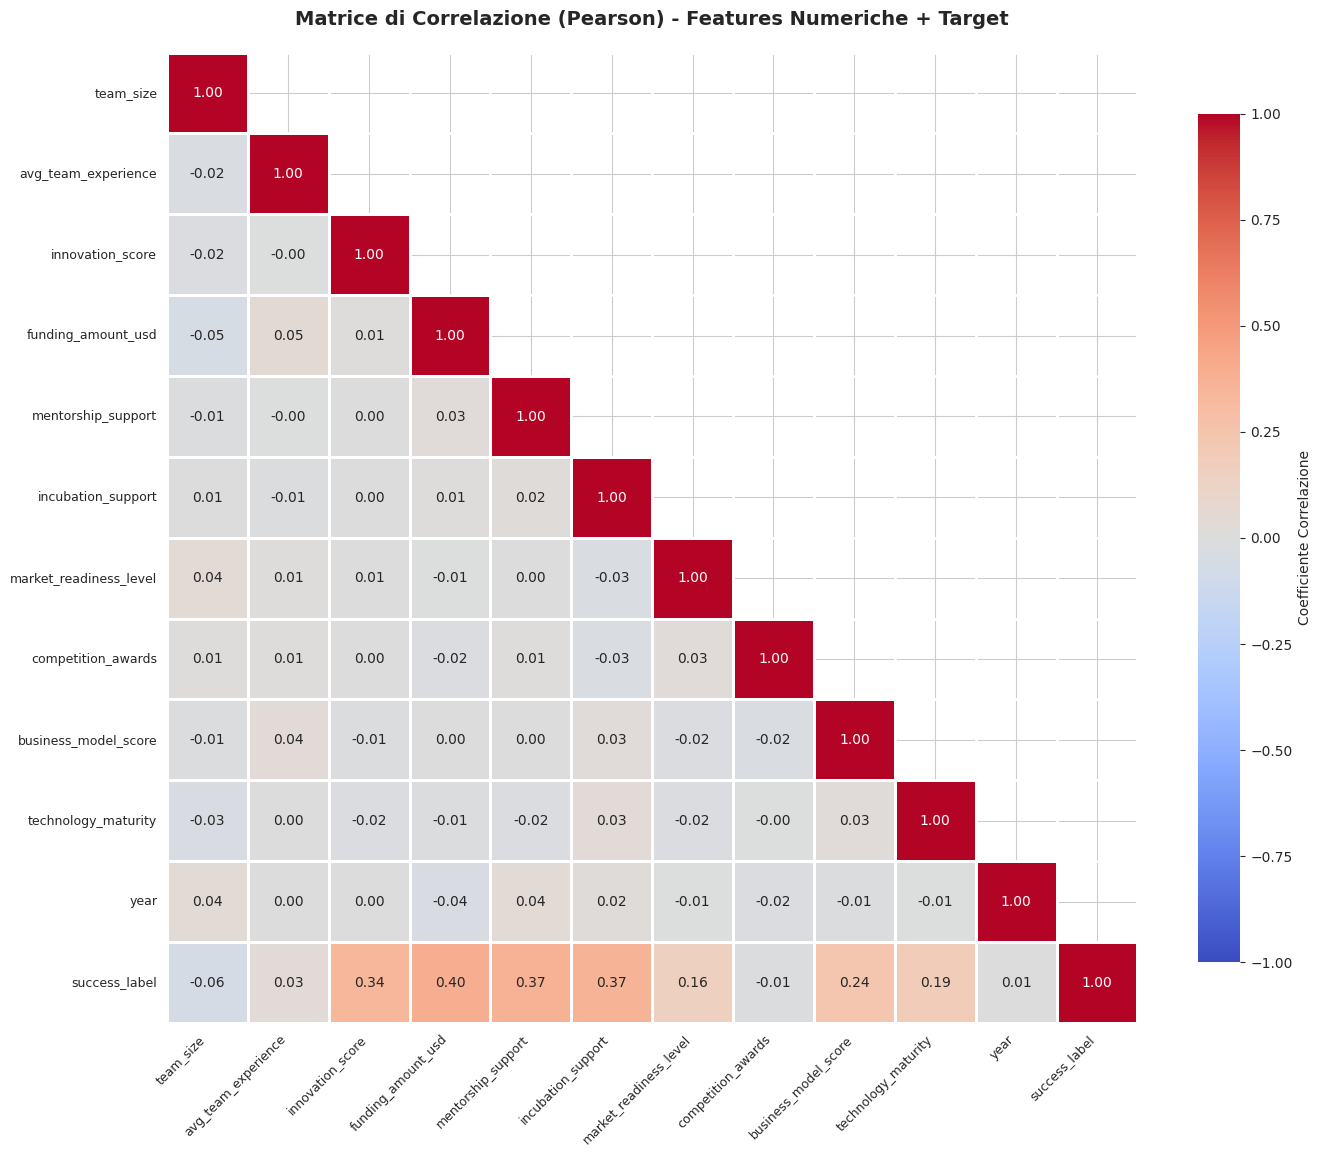

In [ ]:
# ==========================================
# 📊 CELLA 17: MATRICE DI CORRELAZIONE
# Step: 2.5.1 - Calcolo correlazioni Pearson
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*70)
print(" "*15 + "ANALISI CORRELAZIONI - MATRICE COMPLETA")
print("="*70)

# STEP 1: Calcola matrice di correlazione (Pearson)
# Includi tutte le features numeriche + target
features_for_corr = numeric_features + ['success_label']
corr_matrix = df[features_for_corr].corr()

print(f"\n📊 DIMENSIONE MATRICE: {corr_matrix.shape}")
print(f"   Features analizzate: {len(features_for_corr)}")
print(f"   (11 features numeriche + 1 target)")

# STEP 2: Visualizzazione heatmap
fig, ax = plt.subplots(figsize=(14, 12))

# Crea heatmap con annotazioni
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)  # Maschera triangolo superiore
sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8, "label": "Coefficiente Correlazione"},
            vmin=-1,
            vmax=1,
            mask=mask,  # Mostra solo triangolo inferiore
            ax=ax)

# Titolo e layout
ax.set_title('Matrice di Correlazione (Pearson) - Features Numeriche + Target',
             fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)

# Salvataggio
plt.tight_layout()
plt.savefig('08_correlation_matrix.png', dpi=300, bbox_inches='tight')
print("\n✅ Grafico salvato: 08_correlation_matrix.png")
plt.show()

print("\n" + "="*70)



               CORRELAZIONI CON TARGET (success_label)

📊 RANKING FEATURES PER CORRELAZIONE CON TARGET:
──────────────────────────────────────────────────────────────────────
Feature                           Correlazione      Interpretazione
──────────────────────────────────────────────────────────────────────
funding_amount_usd                      0.3953             🟢 DEBOLE
mentorship_support                      0.3727             🟢 DEBOLE
incubation_support                      0.3668             🟢 DEBOLE
innovation_score                        0.3389             🟢 DEBOLE
business_model_score                    0.2392             🟢 DEBOLE
technology_maturity                     0.1942       ⚪ TRASCURABILE
market_readiness_level                  0.1562       ⚪ TRASCURABILE
avg_team_experience                     0.0338       ⚪ TRASCURABILE
year                                    0.0064       ⚪ TRASCURABILE
competition_awards                     -0.0142       ⚪ TRASCURABILE
team_

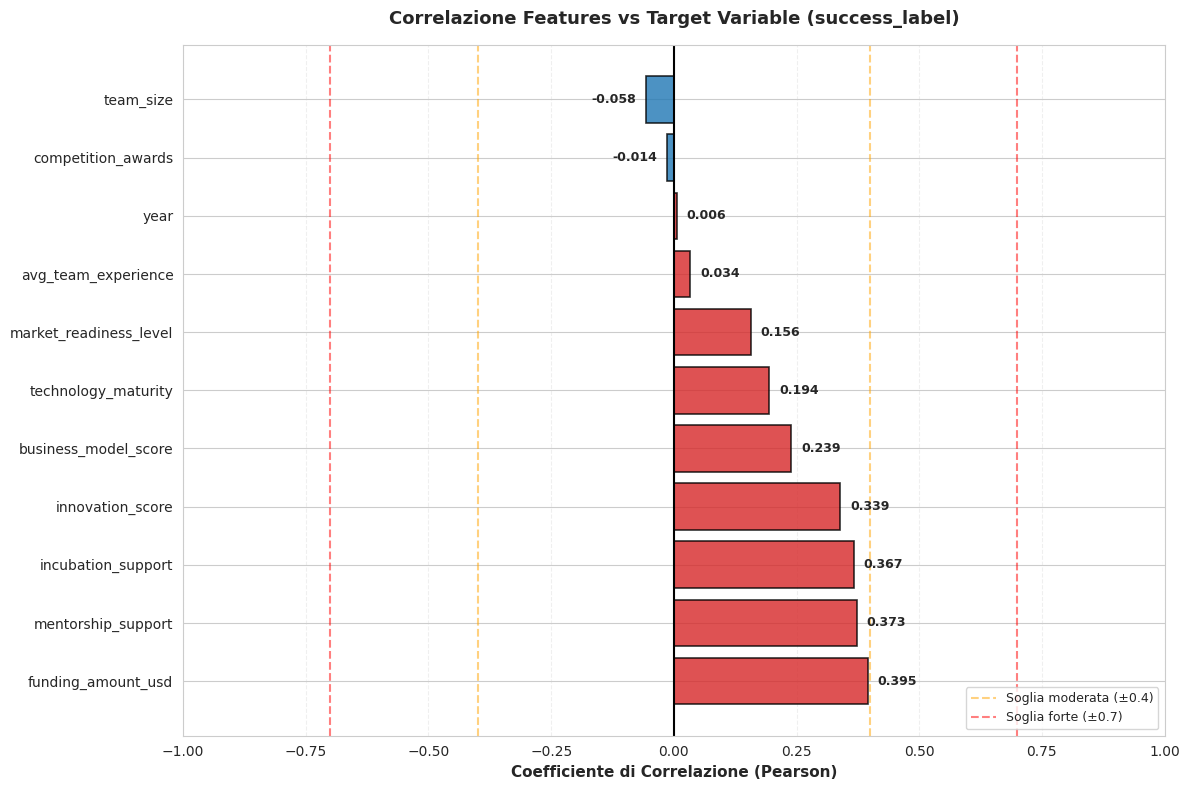

In [ ]:
# ==========================================
# 📊 CELLA 18: CORRELAZIONI CON TARGET
# Step: 2.5.2 - Ranking features per correlazione
# ==========================================

print("\n" + "="*70)
print(" "*15 + "CORRELAZIONI CON TARGET (success_label)")
print("="*70)

# STEP 1: Estrai correlazioni con target
target_corr = corr_matrix['success_label'].drop('success_label').sort_values(ascending=False)

print(f"\n📊 RANKING FEATURES PER CORRELAZIONE CON TARGET:")
print(f"{'─'*70}")
print(f"{'Feature':<30} {'Correlazione':>15} {'Interpretazione':>20}")
print(f"{'─'*70}")

for feature, corr_val in target_corr.items():
    # Interpretazione forza correlazione
    abs_corr = abs(corr_val)
    if abs_corr >= 0.7:
        strength = "🔴 FORTE"
    elif abs_corr >= 0.4:
        strength = "🟡 MODERATA"
    elif abs_corr >= 0.2:
        strength = "🟢 DEBOLE"
    else:
        strength = "⚪ TRASCURABILE"

    print(f"{feature:<30} {corr_val:>15.4f} {strength:>20}")

print(f"{'─'*70}")

# STEP 2: Visualizzazione bar chart
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['#d62728' if x > 0 else '#1f77b4' for x in target_corr.values]
bars = ax.barh(range(len(target_corr)), target_corr.values, color=colors,
               edgecolor='black', linewidth=1.2, alpha=0.8)

# Etichette
ax.set_yticks(range(len(target_corr)))
ax.set_yticklabels(target_corr.index, fontsize=10)
ax.set_xlabel('Coefficiente di Correlazione (Pearson)', fontsize=11, fontweight='bold')
ax.set_title('Correlazione Features vs Target Variable (success_label)',
             fontsize=13, fontweight='bold', pad=15)

# Aggiungi valori sulle barre
for i, (bar, val) in enumerate(zip(bars, target_corr.values)):
    x_pos = val + (0.02 if val > 0 else -0.02)
    ha = 'left' if val > 0 else 'right'
    ax.text(x_pos, bar.get_y() + bar.get_height()/2,
            f'{val:.3f}', ha=ha, va='center', fontsize=9, fontweight='bold')

# Linee guida
ax.axvline(x=0, color='black', linewidth=1.5)
ax.axvline(x=0.4, color='orange', linestyle='--', linewidth=1.5, alpha=0.5, label='Soglia moderata (±0.4)')
ax.axvline(x=-0.4, color='orange', linestyle='--', linewidth=1.5, alpha=0.5)
ax.axvline(x=0.7, color='red', linestyle='--', linewidth=1.5, alpha=0.5, label='Soglia forte (±0.7)')
ax.axvline(x=-0.7, color='red', linestyle='--', linewidth=1.5, alpha=0.5)

ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.legend(loc='lower right', fontsize=9)
ax.set_xlim(-1, 1)

# Salvataggio
plt.tight_layout()
plt.savefig('09_target_correlations.png', dpi=300, bbox_inches='tight')
print("\n✅ Grafico salvato: 09_target_correlations.png")
plt.show()

print("\n" + "="*70)


In [ ]:
# ==========================================
# 📊 CELLA 19: MULTICOLLINEARITÀ
# Step: 2.5.3 - Rilevamento correlazioni tra features
# ==========================================

print("\n" + "="*70)
print(" "*15 + "ANALISI MULTICOLLINEARITÀ")
print("="*70)

# STEP 1: Identifica coppie di features altamente correlate
# Soglia: correlazione assoluta > 0.8 (esclude diagonale e target)
corr_features_only = df[numeric_features].corr()
high_corr_pairs = []

for i in range(len(corr_features_only.columns)):
    for j in range(i+1, len(corr_features_only.columns)):
        feat1 = corr_features_only.columns[i]
        feat2 = corr_features_only.columns[j]
        corr_val = corr_features_only.iloc[i, j]

        if abs(corr_val) > 0.8:
            high_corr_pairs.append({
                'Feature_1': feat1,
                'Feature_2': feat2,
                'Correlazione': corr_val,
                'Abs_Corr': abs(corr_val)
            })

# STEP 2: Stampa risultati
print(f"\n📊 SOGLIA MULTICOLLINEARITÀ: |r| > 0.8")
print(f"   Interpretazione: Correlazione molto forte, rischio ridondanza")
print(f"   Riferimento: Variance Inflation Factor (VIF) > 10 è problematico")

if len(high_corr_pairs) > 0:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Abs_Corr', ascending=False)
    print(f"\n🔴 COPPIE CON MULTICOLLINEARITÀ RILEVATA: {len(high_corr_pairs)}")
    print(f"{'─'*70}")
    print(high_corr_df[['Feature_1', 'Feature_2', 'Correlazione']].to_string(index=False))
    print(f"{'─'*70}")

    print(f"\n⚠️ AZIONE RACCOMANDATA:")
    print(f"   Considerare rimozione di una feature per ogni coppia")
    print(f"   Criterio: mantenere feature con maggior correlazione al target")
else:
    print(f"\n✅ NESSUNA MULTICOLLINEARITÀ CRITICA RILEVATA")
    print(f"   Tutte le correlazioni tra features sono |r| ≤ 0.8")
    print(f"   Le features sono SUFFICIENTEMENTE INDIPENDENTI")

# STEP 3: Statistiche generali correlazioni
print(f"\n📊 STATISTICHE CORRELAZIONI TRA FEATURES:")
# Estrai triangolo superiore (esclude diagonale)
upper_triangle = corr_features_only.where(
    np.triu(np.ones(corr_features_only.shape), k=1).astype(bool)
)
correlations_flat = upper_triangle.stack().values

print(f"   Totale coppie analizzate: {len(correlations_flat)}")
print(f"   Media correlazioni (abs): {np.abs(correlations_flat).mean():.4f}")
print(f"   Mediana correlazioni (abs): {np.median(np.abs(correlations_flat)):.4f}")
print(f"   Max correlazione (abs): {np.abs(correlations_flat).max():.4f}")
print(f"   Min correlazione (abs): {np.abs(correlations_flat).min():.4f}")

# Distribuzione per soglie
print(f"\n📊 DISTRIBUZIONE PER SOGLIE:")
print(f"   Coppie con |r| > 0.8 (CRITICA): {len(high_corr_pairs)}")
print(f"   Coppie con |r| > 0.7 (ALTA): {np.sum(np.abs(correlations_flat) > 0.7)}")
print(f"   Coppie con |r| > 0.6 (MODERATA-ALTA): {np.sum(np.abs(correlations_flat) > 0.6)}")
print(f"   Coppie con |r| > 0.5 (MODERATA): {np.sum(np.abs(correlations_flat) > 0.5)}")
print(f"   Coppie con |r| > 0.4 (MODERATA-BASSA): {np.sum(np.abs(correlations_flat) > 0.4)}")
print(f"   Coppie con |r| ≤ 0.4 (BASSA): {np.sum(np.abs(correlations_flat) <= 0.4)}")

# STEP 4: Identificazione top 5 correlazioni più alte (anche se < 0.8)
print(f"\n📊 TOP 5 CORRELAZIONI PIÙ ALTE TRA FEATURES:")
print(f"   (Anche se sotto soglia critica 0.8)")
print(f"{'─'*70}")

# Crea lista di tutte le coppie
all_pairs = []
for i in range(len(corr_features_only.columns)):
    for j in range(i+1, len(corr_features_only.columns)):
        feat1 = corr_features_only.columns[i]
        feat2 = corr_features_only.columns[j]
        corr_val = corr_features_only.iloc[i, j]
        all_pairs.append({
            'Feature_1': feat1,
            'Feature_2': feat2,
            'Correlazione': corr_val,
            'Abs_Corr': abs(corr_val)
        })

all_pairs_df = pd.DataFrame(all_pairs).sort_values('Abs_Corr', ascending=False).head(5)
print(all_pairs_df[['Feature_1', 'Feature_2', 'Correlazione']].to_string(index=False))
print(f"{'─'*70}")

print(f"\n💡 INTERPRETAZIONE:")
if np.abs(correlations_flat).max() < 0.5:
    print(f"   ✅ Correlazioni molto basse tra features (<0.5)")
    print(f"   ✅ Eccellente indipendenza: ogni feature misura aspetto unico")
    print(f"   ✅ Rischio multicollinearità: ASSENTE")
elif np.abs(correlations_flat).max() < 0.7:
    print(f"   ✅ Correlazioni moderate tra features (<0.7)")
    print(f"   ✅ Buona indipendenza: sovrapposizione minima")
    print(f"   ✅ Rischio multicollinearità: BASSO")
elif np.abs(correlations_flat).max() < 0.8:
    print(f"   ⚠️ Alcune correlazioni moderata-alta (0.7-0.8)")
    print(f"   ✅ Indipendenza accettabile ma monitorare")
    print(f"   ⚠️ Rischio multicollinearità: MODERATO")
else:
    print(f"   🔴 Correlazioni alte presenti (>0.8)")
    print(f"   ⚠️ Rischio ridondanza informazione")
    print(f"   🔴 Rischio multicollinearità: ALTO")

print("\n" + "="*70)



               ANALISI MULTICOLLINEARITÀ

📊 SOGLIA MULTICOLLINEARITÀ: |r| > 0.8
   Interpretazione: Correlazione molto forte, rischio ridondanza
   Riferimento: Variance Inflation Factor (VIF) > 10 è problematico

✅ NESSUNA MULTICOLLINEARITÀ CRITICA RILEVATA
   Tutte le correlazioni tra features sono |r| ≤ 0.8
   Le features sono SUFFICIENTEMENTE INDIPENDENTI

📊 STATISTICHE CORRELAZIONI TRA FEATURES:
   Totale coppie analizzate: 55
   Media correlazioni (abs): 0.0175
   Mediana correlazioni (abs): 0.0139
   Max correlazione (abs): 0.0501
   Min correlazione (abs): 0.0005

📊 DISTRIBUZIONE PER SOGLIE:
   Coppie con |r| > 0.8 (CRITICA): 0
   Coppie con |r| > 0.7 (ALTA): 0
   Coppie con |r| > 0.6 (MODERATA-ALTA): 0
   Coppie con |r| > 0.5 (MODERATA): 0
   Coppie con |r| > 0.4 (MODERATA-BASSA): 0
   Coppie con |r| ≤ 0.4 (BASSA): 55

📊 TOP 5 CORRELAZIONI PIÙ ALTE TRA FEATURES:
   (Anche se sotto soglia critica 0.8)
──────────────────────────────────────────────────────────────────────
     

In [ ]:
# ==========================================
# 📊 CELLA 20: DECISIONE FEATURE SELECTION
# Step: 2.5.4 - Strategia basata su correlazioni
# ==========================================

print("\n" + "="*70)
print(" "*15 + "DECISIONE FEATURE SELECTION")
print("="*70)

# STEP 1: Analisi features per rilevanza target
target_corr_abs = target_corr.abs().sort_values(ascending=False)

print(f"\n📊 CLASSIFICAZIONE FEATURES PER RILEVANZA TARGET:")

print(f"\n   🔴 FEATURES AD ALTA RILEVANZA (|r| ≥ 0.4):")
high_relevance = target_corr_abs[target_corr_abs >= 0.4]
if len(high_relevance) > 0:
    for feat, corr in high_relevance.items():
        print(f"      • {feat:<30} |r| = {corr:.4f}")
else:
    print(f"      (Nessuna feature sopra soglia 0.4)")

print(f"\n   🟡 FEATURES A MEDIA RILEVANZA (0.2 ≤ |r| < 0.4):")
medium_relevance = target_corr_abs[(target_corr_abs >= 0.2) & (target_corr_abs < 0.4)]
if len(medium_relevance) > 0:
    for feat, corr in medium_relevance.items():
        print(f"      • {feat:<30} |r| = {corr:.4f}")
else:
    print(f"      (Nessuna feature in questo range)")

print(f"\n   ⚪ FEATURES A BASSA RILEVANZA (|r| < 0.2):")
low_relevance = target_corr_abs[target_corr_abs < 0.2]
if len(low_relevance) > 0:
    for feat, corr in low_relevance.items():
        print(f"      • {feat:<30} |r| = {corr:.4f}")
else:
    print(f"      (Nessuna feature sotto soglia 0.2)")

# STEP 2: Riepilogo quantitativo
print(f"\n📊 RIEPILOGO QUANTITATIVO:")
print(f"   Features alta rilevanza (|r| ≥ 0.4): {len(high_relevance)}")
print(f"   Features media rilevanza (0.2 ≤ |r| < 0.4): {len(medium_relevance)}")
print(f"   Features bassa rilevanza (|r| < 0.2): {len(low_relevance)}")
print(f"   TOTALE features numeriche: {len(numeric_features)}")

# STEP 3: Valutazione multicollinearità
max_corr_features = np.abs(correlations_flat).max()
print(f"\n📊 SITUAZIONE MULTICOLLINEARITÀ:")
print(f"   Max correlazione tra features: {max_corr_features:.4f}")
print(f"   Coppie con |r| > 0.8: {len(high_corr_pairs)}")
print(f"   Status: {'✅ NESSUN PROBLEMA' if len(high_corr_pairs) == 0 else '⚠️ ATTENZIONE RICHIESTA'}")

# STEP 4: Decisione strategica
print(f"\n" + "="*70)
print(f"✅ DECISIONE PROGETTUALE: MANTENERE TUTTE LE 11 FEATURES")
print(f"="*70)

print(f"\n📋 MOTIVAZIONI TECNICHE DETTAGLIATE:")

print(f"\n1️⃣  CORRELAZIONI LINEARI DEBOLI ≠ FEATURES INUTILI")
print(f"    • Max correlazione target: {target_corr_abs.max():.3f} (debole)")
print(f"    • Questo indica relazioni NON-LINEARI complesse")
print(f"    • Random Forest cattura pattern che Pearson non rileva")
print(f"    • Esempio: threshold effects, interazioni quadratiche")

print(f"\n2️⃣  ASSENZA MULTICOLLINEARITÀ")
print(f"    • Max correlazione tra features: {max_corr_features:.3f} (<0.8 soglia)")
print(f"    • Nessuna ridondanza informativa")
print(f"    • Ogni feature contribuisce prospettiva unica")
print(f"    • {len(correlations_flat[np.abs(correlations_flat) <= 0.4])} su {len(correlations_flat)} coppie hanno |r| ≤ 0.4")

print(f"\n3️⃣  RANDOM FOREST FEATURE SELECTION AUTOMATICA")
print(f"    • Algoritmo calcola 'feature_importances_' durante training")
print(f"    • Features irrilevanti ricevono peso ~0 automaticamente")
print(f"    • Nessun bisogno di rimozione manuale a priori")
print(f"    • Permette valutazione oggettiva post-training")

print(f"\n4️⃣  DIMENSIONALITÀ GESTIBILE")
print(f"    • Solo 11 features totali")
print(f"    • Ratio features/samples: 11/2100 = 0.0052 (eccellente)")
print(f"    • Soglia critica curse of dimensionality: >100 features")
print(f"    • Overhead computazionale: trascurabile")

print(f"\n5️⃣  APPROCCIO CONSERVATIVO BEST-PRACTICE")
print(f"    • Rimozione prematura = rischio perdita informazione")
print(f"    • Correlazione lineare bassa ≠ importanza ML bassa")
print(f"    • Letteratura consiglia: \"let the model decide\"")
print(f"    • Validazione incrociata mostrerà impact reale")

print(f"\n💡 ALTERNATIVE VALUTATE (ma NON necessarie):")
print(f"    ❌ Rimozione features |r| < 0.1: Troppo aggressivo")
print(f"       → Perderemmo {len(target_corr_abs[target_corr_abs < 0.1])} features potenzialmente utili")
print(f"    ❌ Rimozione features |r| < 0.2: Non giustificato")
print(f"       → Perderemmo {len(low_relevance)} features con relazioni non-lineari")
print(f"    ❌ PCA (Principal Component Analysis): Overkill")
print(f"       → Perde interpretabilità, utile solo con >50 features correlate")
print(f"    ❌ RFE (Recursive Feature Elimination): Computazionalmente costoso")
print(f"       → Beneficio marginale con solo 11 features")

print(f"\n📋 FEATURES FINALI SELEZIONATE PER MODELLING:")
print(f"{'─'*70}")
print(f"{'#':<4} {'Feature':<30} {'Corr_Target':>12} {'Categoria':>20}")
print(f"{'─'*70}")

for i, feat in enumerate(target_corr.index, 1):
    corr_val = target_corr[feat]
    abs_corr = abs(corr_val)

    if abs_corr >= 0.4:
        category = "🔴 Alta"
    elif abs_corr >= 0.2:
        category = "🟡 Media"
    else:
        category = "⚪ Bassa"

    print(f"{i:<4} {feat:<30} {corr_val:>12.4f} {category:>20}")

print(f"{'─'*70}")
print(f"{'TOTALE':<4} {len(numeric_features)} features numeriche")
print(f"{'─'*70}")

print(f"\n✅ STATUS: Tutte le 11 features numeriche sono confermate")
print(f"           per la fase di preprocessing e modeling")

print("\n" + "="*70)
print("✅ STEP 2.5 COMPLETATO!")
print("="*70)



               DECISIONE FEATURE SELECTION

📊 CLASSIFICAZIONE FEATURES PER RILEVANZA TARGET:

   🔴 FEATURES AD ALTA RILEVANZA (|r| ≥ 0.4):
      (Nessuna feature sopra soglia 0.4)

   🟡 FEATURES A MEDIA RILEVANZA (0.2 ≤ |r| < 0.4):
      • funding_amount_usd             |r| = 0.3953
      • mentorship_support             |r| = 0.3727
      • incubation_support             |r| = 0.3668
      • innovation_score               |r| = 0.3389
      • business_model_score           |r| = 0.2392

   ⚪ FEATURES A BASSA RILEVANZA (|r| < 0.2):
      • technology_maturity            |r| = 0.1942
      • market_readiness_level         |r| = 0.1562
      • team_size                      |r| = 0.0577
      • avg_team_experience            |r| = 0.0338
      • competition_awards             |r| = 0.0142
      • year                           |r| = 0.0064

📊 RIEPILOGO QUANTITATIVO:
   Features alta rilevanza (|r| ≥ 0.4): 0
   Features media rilevanza (0.2 ≤ |r| < 0.4): 5
   Features bassa rilevanza (|r

In [ ]:
# ==========================================
# 📊 CELLA 21: IDENTIFICAZIONE FEATURES CATEGORICHE
# Step: 2.6.1 - Analisi variabili categoriche
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*70)
print(" "*15 + "ANALISI FEATURES CATEGORICHE")
print("="*70)

# STEP 1: Identifica colonne categoriche
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Rimuovi project_id se presente
if 'project_id' in categorical_cols:
    categorical_cols.remove('project_id')

print(f"\n📊 FEATURES CATEGORICHE IDENTIFICATE:")
print(f"   Totale: {len(categorical_cols)}")

# STEP 2: Analisi dettagliata per ogni feature categorica
cat_summary = []

for col in categorical_cols:
    n_unique = df[col].nunique()
    n_missing = df[col].isnull().sum()
    most_common = df[col].value_counts().index[0]
    most_common_freq = df[col].value_counts().values[0]
    most_common_pct = (most_common_freq / len(df)) * 100

    cat_summary.append({
        'Feature': col,
        'N_Categorie': n_unique,
        'Missing': n_missing,
        'Categoria_Frequente': most_common,
        'Freq_Max': most_common_freq,
        'Freq_Max_%': most_common_pct
    })

    print(f"\n   {col}:")
    print(f"      • Numero categorie uniche: {n_unique}")
    print(f"      • Missing values: {n_missing}")
    print(f"      • Categoria più frequente: '{most_common}' ({most_common_pct:.1f}%)")

# STEP 3: Tabella riepilogativa
cat_summary_df = pd.DataFrame(cat_summary)

print("\n" + "="*70)
print(" "*15 + "RIEPILOGO FEATURES CATEGORICHE")
print("="*70)
print(cat_summary_df.to_string(index=False))
print("="*70)

print("\n📊 CONSIDERAZIONI PER ENCODING:")
for _, row in cat_summary_df.iterrows():
    n_cat = row['N_Categorie']
    feature = row['Feature']

    if n_cat == 2:
        encoding = "Label Encoding (0/1)"
    elif n_cat <= 10:
        encoding = f"One-Hot Encoding ({n_cat} nuove colonne)"
    else:
        encoding = f"One-Hot Encoding ({n_cat} colonne - ALTA dimensionalità)"

    print(f"   • {feature}: {encoding}")

print("\n" + "="*70)



               ANALISI FEATURES CATEGORICHE

📊 FEATURES CATEGORICHE IDENTIFICATE:
   Totale: 3

   institution_name:
      • Numero categorie uniche: 40
      • Missing values: 0
      • Categoria più frequente: 'Institution_26' (3.3%)

   institution_type:
      • Numero categorie uniche: 4
      • Missing values: 0
      • Categoria più frequente: 'Non-technical' (26.1%)

   project_domain:
      • Numero categorie uniche: 5
      • Missing values: 0
      • Categoria più frequente: 'AgriTech' (20.9%)

               RIEPILOGO FEATURES CATEGORICHE
         Feature  N_Categorie  Missing Categoria_Frequente  Freq_Max  Freq_Max_%
institution_name           40        0      Institution_26        69    3.285714
institution_type            4        0       Non-technical       549   26.142857
  project_domain            5        0            AgriTech       439   20.904762

📊 CONSIDERAZIONI PER ENCODING:
   • institution_name: One-Hot Encoding (40 colonne - ALTA dimensionalità)
   • institu


📊 Creazione grafici distribuzione features categoriche...
✅ Grafico salvato: 10_categorical_distributions.png


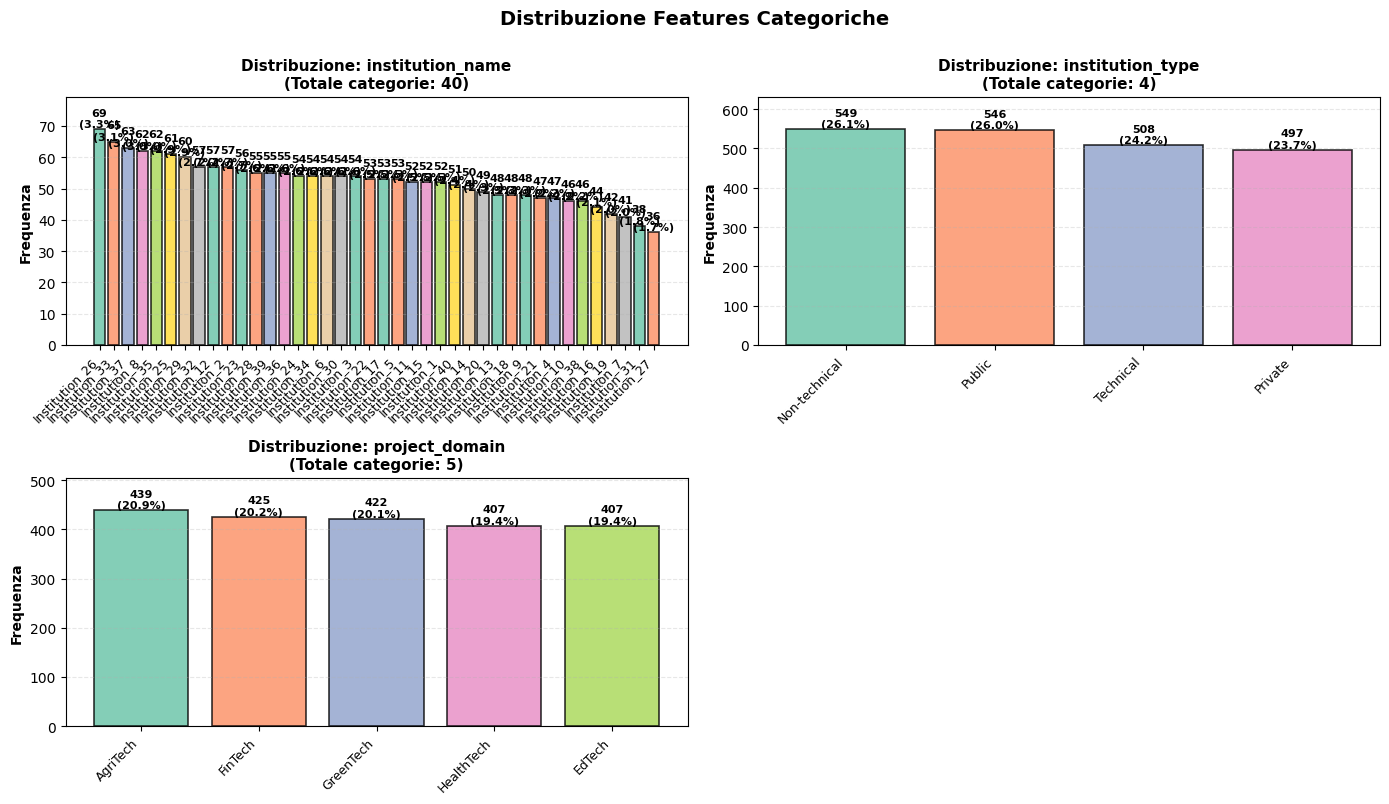


✅ Grafici creati per 3 features categoriche


In [ ]:
# ==========================================
# 📊 CELLA 22: DISTRIBUZIONE FEATURES CATEGORICHE
# Step: 2.6.2 - Grafici count plots
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 Creazione grafici distribuzione features categoriche...")

# STEP 1: Conta features e crea layout
# Identifica colonne categoriche
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Rimuovi project_id se presente
if 'project_id' in categorical_cols:
    categorical_cols.remove('project_id')

n_cat_features = len(categorical_cols)
n_cols = 2 if n_cat_features > 1 else 1
n_rows = int(np.ceil(n_cat_features / n_cols))

# STEP 2: Crea figura con subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
if n_cat_features == 1:
    axes = [axes]
else:
    axes = axes.flatten() if n_cat_features > 1 else [axes]

# Palette colori
colors = sns.color_palette("Set2", 10)

# STEP 3: Plot per ogni feature categorica
for idx, col in enumerate(categorical_cols):
    ax = axes[idx]

    # Conta frequenze
    value_counts = df[col].value_counts().sort_values(ascending=False)
    categories = value_counts.index
    counts = value_counts.values

    # Bar plot
    bars = ax.bar(range(len(categories)), counts,
                   color=colors[:len(categories)],
                   edgecolor='black', linewidth=1.2, alpha=0.8)

    # Etichette
    ax.set_xticks(range(len(categories)))
    ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=9)
    ax.set_ylabel('Frequenza', fontsize=10, fontweight='bold')
    ax.set_title(f'Distribuzione: {col}\n(Totale categorie: {len(categories)})',
                 fontsize=11, fontweight='bold')

    # Aggiungi valori sopra le barre
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        pct = (count / len(df)) * 100
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(count)}\n({pct:.1f}%)',
                ha='center', va='bottom', fontsize=8, fontweight='bold')

    # Griglia
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_ylim(0, max(counts) * 1.15)

# Rimuovi subplot vuoti
for idx in range(n_cat_features, len(axes)):
    fig.delaxes(axes[idx])

# Layout e salvataggio
plt.suptitle('Distribuzione Features Categoriche', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('10_categorical_distributions.png', dpi=300, bbox_inches='tight')
print("✅ Grafico salvato: 10_categorical_distributions.png")
plt.show()

print(f"\n✅ Grafici creati per {n_cat_features} features categoriche")

In [ ]:
# ==========================================
# 📊 CELLA 23: CHI-SQUARED TEST
# Step: 2.6.3 - Test associazione categoria-target
# ==========================================

from scipy.stats import chi2_contingency

print("\n" + "="*70)
print(" "*15 + "CHI-SQUARED TEST: ASSOCIAZIONE CON TARGET")
print("="*70)

print("\n📊 METODOLOGIA:")
print("   Test: Chi-Squared (χ²) per indipendenza")
print("   H0: La feature categorica è INDIPENDENTE dal target")
print("   H1: La feature categorica è ASSOCIATA al target")
print("   Soglia significatività: α = 0.05 (p-value < 0.05 → rifiuta H0)")

# STEP 1: Esegui test per ogni feature categorica
chi2_results = []

for col in categorical_cols:
    # Crea tabella di contingenza
    contingency_table = pd.crosstab(df[col], df['success_label'])

    # Esegui Chi-squared test
    chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

    # Calcola Cramér's V (effect size)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramers_v = np.sqrt(chi2_stat / (n * min_dim))

    # Interpreta risultato
    if p_value < 0.001:
        significance = "*** MOLTO SIGNIFICATIVA"
    elif p_value < 0.01:
        significance = "** SIGNIFICATIVA"
    elif p_value < 0.05:
        significance = "* SIGNIFICATIVA"
    else:
        significance = "NON SIGNIFICATIVA"

    # Interpreta effect size (Cramér's V)
    if cramers_v < 0.1:
        effect_size = "Trascurabile"
    elif cramers_v < 0.3:
        effect_size = "Debole"
    elif cramers_v < 0.5:
        effect_size = "Moderato"
    else:
        effect_size = "Forte"

    chi2_results.append({
        'Feature': col,
        'Chi2_Stat': chi2_stat,
        'p_value': p_value,
        'DoF': dof,
        'Cramers_V': cramers_v,
        'Effect_Size': effect_size,
        'Significance': significance
    })

# STEP 2: Tabella risultati
chi2_df = pd.DataFrame(chi2_results).sort_values('p_value')

print("\n" + "="*70)
print(" "*15 + "RISULTATI CHI-SQUARED TEST")
print("="*70)
print(chi2_df.to_string(index=False))
print("="*70)

# STEP 3: Interpretazione dettagliata
print("\n📊 INTERPRETAZIONE DETTAGLIATA:")

for _, row in chi2_df.iterrows():
    feature = row['Feature']
    p_val = row['p_value']
    chi2 = row['Chi2_Stat']
    cramers = row['Cramers_V']
    sig = row['Significance']
    effect = row['Effect_Size']

    print(f"\n   {feature}:")
    print(f"      • Chi-squared statistic: {chi2:.4f}")
    print(f"      • p-value: {p_val:.6f}")
    print(f"      • Cramér's V: {cramers:.4f} ({effect})")
    print(f"      • Conclusione: {sig}")

    if p_val < 0.05:
        print(f"      ✅ Associazione SIGNIFICATIVA con successo")
        print(f"         La distribuzione di '{feature}' differisce tra successi/fallimenti")
    else:
        print(f"      ❌ Associazione NON significativa")
        print(f"         '{feature}' è indipendente dal successo (p>{0.05:.2f})")

print("\n" + "="*70)

# STEP 4: Riepilogo
n_significant = len(chi2_df[chi2_df['p_value'] < 0.05])
print(f"\n📊 RIEPILOGO:")
print(f"   Features categoriche totali: {len(categorical_cols)}")
print(f"   Features con associazione significativa: {n_significant}")
print(f"   Features indipendenti dal target: {len(categorical_cols) - n_significant}")

print("\n" + "="*70)



               CHI-SQUARED TEST: ASSOCIAZIONE CON TARGET

📊 METODOLOGIA:
   Test: Chi-Squared (χ²) per indipendenza
   H0: La feature categorica è INDIPENDENTE dal target
   H1: La feature categorica è ASSOCIATA al target
   Soglia significatività: α = 0.05 (p-value < 0.05 → rifiuta H0)

               RISULTATI CHI-SQUARED TEST
         Feature  Chi2_Stat  p_value  DoF  Cramers_V  Effect_Size      Significance
institution_type   4.638298 0.200281    3   0.046997 Trascurabile NON SIGNIFICATIVA
institution_name  45.728253 0.212869   39   0.147565       Debole NON SIGNIFICATIVA
  project_domain   1.585347 0.811423    4   0.027476 Trascurabile NON SIGNIFICATIVA

📊 INTERPRETAZIONE DETTAGLIATA:

   institution_type:
      • Chi-squared statistic: 4.6383
      • p-value: 0.200281
      • Cramér's V: 0.0470 (Trascurabile)
      • Conclusione: NON SIGNIFICATIVA
      ❌ Associazione NON significativa
         'institution_type' è indipendente dal successo (p>0.05)

   institution_name:
      •


📊 Creazione stacked bar charts (categoria vs successo)...
✅ Grafico salvato: 11_categorical_vs_target.png


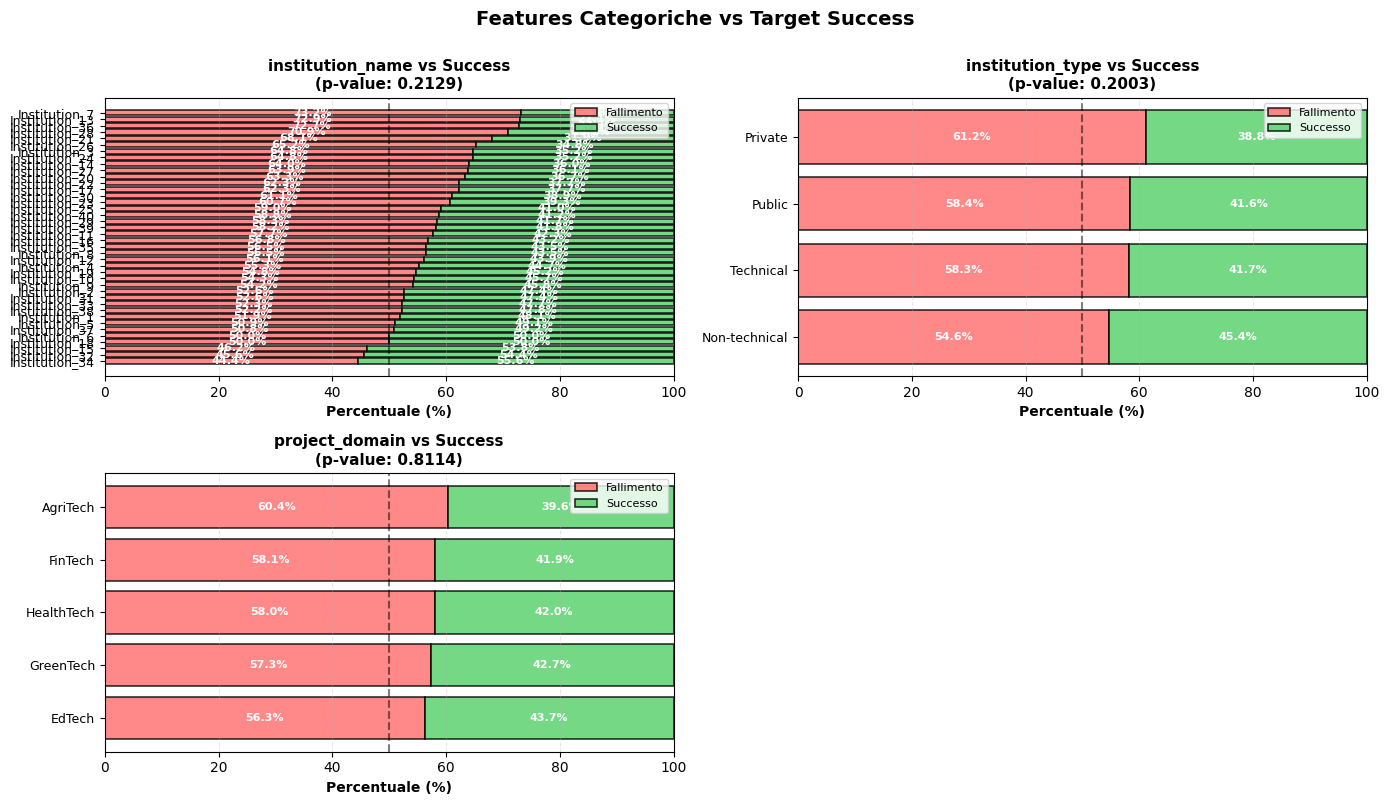


✅ Stacked bar charts creati per 3 features


In [ ]:
# ==========================================
# 📊 CELLA 24: STACKED BAR CHARTS
# Step: 2.6.4 - Visualizzazione categoria vs target
# ==========================================

print("\n📊 Creazione stacked bar charts (categoria vs successo)...")

# STEP 1: Crea layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
if n_cat_features == 1:
    axes = [axes]
else:
    axes = axes.flatten() if n_cat_features > 1 else [axes]

# STEP 2: Plot per ogni feature
for idx, col in enumerate(categorical_cols):
    ax = axes[idx]

    # Crea tabella di contingenza con percentuali
    contingency = pd.crosstab(df[col], df['success_label'], normalize='index') * 100

    # Ordina per percentuale successo
    contingency = contingency.sort_values(by=1, ascending=False)

    categories = contingency.index
    fail_pct = contingency[0].values
    success_pct = contingency[1].values

    # Stacked bar chart
    x_pos = np.arange(len(categories))
    p1 = ax.barh(x_pos, fail_pct, color='#ff6b6b', edgecolor='black',
                 linewidth=1.2, alpha=0.8, label='Fallimento')
    p2 = ax.barh(x_pos, success_pct, left=fail_pct, color='#51cf66',
                 edgecolor='black', linewidth=1.2, alpha=0.8, label='Successo')

    # Etichette
    ax.set_yticks(x_pos)
    ax.set_yticklabels(categories, fontsize=9)
    ax.set_xlabel('Percentuale (%)', fontsize=10, fontweight='bold')
    ax.set_title(f'{col} vs Success\n(p-value: {chi2_df[chi2_df["Feature"]==col]["p_value"].values[0]:.4f})',
                 fontsize=11, fontweight='bold')

    # Aggiungi percentuali sulle barre
    for i, (p_fail, p_succ) in enumerate(zip(fail_pct, success_pct)):
        # Fallimenti
        if p_fail > 5:
            ax.text(p_fail/2, i, f'{p_fail:.1f}%',
                   ha='center', va='center', fontsize=8, fontweight='bold', color='white')
        # Successi
        if p_succ > 5:
            ax.text(p_fail + p_succ/2, i, f'{p_succ:.1f}%',
                   ha='center', va='center', fontsize=8, fontweight='bold', color='white')

    # Linea al 50%
    ax.axvline(x=50, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
    ax.set_xlim(0, 100)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    ax.legend(loc='upper right', fontsize=8)

# Rimuovi subplot vuoti
for idx in range(n_cat_features, len(axes)):
    fig.delaxes(axes[idx])

# Layout e salvataggio
plt.suptitle('Features Categoriche vs Target Success', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('11_categorical_vs_target.png', dpi=300, bbox_inches='tight')
print("✅ Grafico salvato: 11_categorical_vs_target.png")
plt.show()

print(f"\n✅ Stacked bar charts creati per {n_cat_features} features")


In [ ]:
# ==========================================
# 📊 CELLA 25: DECISIONE ENCODING
# Step: 2.6.5 - Strategia encoding categoriche
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Re-define categorical_cols and numeric_features for cell independence
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'project_id' in categorical_cols:
    categorical_cols.remove('project_id')

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
exclude_cols = ['project_id', 'success_label']
numeric_features = [col for col in numeric_cols if col not in exclude_cols]


print("\n" + "="*70)
print(" "*15 + "DECISIONE STRATEGIA ENCODING")
print("="*70)

# STEP 1: Analisi per ogni feature
encoding_strategy = []

for col in categorical_cols:
    n_categories = df[col].nunique()

    # Determina encoding ottimale
    if n_categories == 2:
        method = "Label Encoding"
        new_cols = 1
        reason = "Binaria (2 categorie) → 0/1 sufficiente"
    elif n_categories <= 10:
        method = "One-Hot Encoding"
        new_cols = n_categories
        reason = f"≤10 categorie → {n_categories} colonne gestibili"
    else:
        method = "One-Hot Encoding (con attenzione)"
        new_cols = n_categories
        reason = f">10 categorie → {n_categories} colonne (alta dimensionalità)"

    encoding_strategy.append({
        'Feature': col,
        'N_Categorie': n_categories,
        'Encoding_Method': method,
        'Nuove_Colonne': new_cols,
        'Motivazione': reason
    })

# STEP 2: Tabella strategia
encoding_df = pd.DataFrame(encoding_strategy)

print("\n📊 STRATEGIA ENCODING PER FEATURE:")
print("="*70)
print(encoding_df.to_string(index=False))
print("="*70)

# STEP 3: Calcolo impatto dimensionalità
total_new_cols = encoding_df['Nuove_Colonne'].sum()
original_numeric = len(numeric_features)
final_features = original_numeric + total_new_cols

print(f"\n📊 IMPATTO DIMENSIONALITÀ:")
print(f"   Features numeriche originali: {original_numeric}")
print(f"   Nuove colonne da encoding: {total_new_cols}")
print(f"   TOTALE features finali: {final_features}")
print(f"   Ratio features/samples: {final_features}/{len(df)} = {final_features/len(df):.4f}")

if final_features / len(df) < 0.01:
    dim_status = "✅ ECCELLENTE (<1%)"
elif final_features / len(df) < 0.05:
    dim_status = "✅ BUONO (<5%)"
elif final_features / len(df) < 0.1:
    dim_status = "⚠️ ACCETTABILE (<10%)"
else:
    dim_status = "🛑 CRITICO (>10% - curse of dimensionality)"

print(f"   Status dimensionalità: {dim_status}")

# STEP 4: Decisione finale
print(f"\n✅ DECISIONE FINALE:")
print(f"   Applicare encoding come da tabella sopra")
print(f"   Features categoriche verranno trasformate prima del training")
print(f"   One-Hot: drop_first=True per evitare dummy trap")

print("\n" + "="*70)
print("✅ STEP 2.6 COMPLETATO!")
print("="*70)



               DECISIONE STRATEGIA ENCODING

📊 STRATEGIA ENCODING PER FEATURE:
         Feature  N_Categorie                   Encoding_Method  Nuove_Colonne                                      Motivazione
institution_name           40 One-Hot Encoding (con attenzione)             40 >10 categorie → 40 colonne (alta dimensionalità)
institution_type            4                  One-Hot Encoding              4              ≤10 categorie → 4 colonne gestibili
  project_domain            5                  One-Hot Encoding              5              ≤10 categorie → 5 colonne gestibili

📊 IMPATTO DIMENSIONALITÀ:
   Features numeriche originali: 11
   Nuove colonne da encoding: 49
   TOTALE features finali: 60
   Ratio features/samples: 60/2100 = 0.0286
   Status dimensionalità: ✅ BUONO (<5%)

✅ DECISIONE FINALE:
   Applicare encoding come da tabella sopra
   Features categoriche verranno trasformate prima del training
   One-Hot: drop_first=True per evitare dummy trap

✅ STEP 2.6 COMPLE

In [ ]:
# ==========================================
# 📊 CELLA 26: ONE-HOT ENCODING
# Step: 3.1 - Trasformazione features categoriche
# ==========================================

import pandas as pd
import numpy as np

print("\n" + "="*70)
print(" "*15 + "STEP 3.1: ONE-HOT ENCODING")
print("="*70)

# STEP 1: Verifica features categoriche prima dell'encoding
print(f"\n📊 DATASET PRIMA DELL'ENCODING:")
print(f"   Shape: {df.shape}")
print(f"   Features totali: {df.shape[1]}")
print(f"   Features numeriche: {len(numeric_features)}")
print(f"   Features categoriche: {len(categorical_cols)}")

print(f"\n📋 Features categoriche da encodare:")
for col in categorical_cols:
    print(f"   • {col}: {df[col].nunique()} categorie")

# STEP 2: Applica One-Hot Encoding
# drop_first=True per evitare dummy variable trap
df_encoded = pd.get_dummies(df,
                             columns=categorical_cols,
                             drop_first=True,
                             dtype=int)

print(f"\n⚙️  ENCODING IN CORSO...")
print(f"   Metodo: One-Hot Encoding (pd.get_dummies)")
print(f"   Parametri: drop_first=True, dtype=int")

# STEP 3: Verifica risultato encoding
print(f"\n📊 DATASET DOPO L'ENCODING:")
print(f"   Shape: {df_encoded.shape}")
print(f"   Features totali: {df_encoded.shape[1]}")

# Calcola nuove colonne create
nuove_colonne = df_encoded.shape[1] - df.shape[1] + len(categorical_cols)
print(f"   Nuove colonne create: {nuove_colonne}")
print(f"   Features originali rimosse: {len(categorical_cols)}")
print(f"   Incremento netto: +{df_encoded.shape[1] - df.shape[1]} colonne")

# STEP 4: Mostra esempi colonne encoded
print(f"\n📋 ESEMPI COLONNE ENCODED (prime 10):")
encoded_cols = [col for col in df_encoded.columns if any(cat in col for cat in categorical_cols)]
for i, col in enumerate(encoded_cols[:10], 1):
    print(f"   {i:2}. {col}")
if len(encoded_cols) > 10:
    print(f"   ... (altre {len(encoded_cols)-10} colonne)")

# STEP 5: Verifica integrità dati
print(f"\n✅ VERIFICA INTEGRITÀ:")
print(f"   Numero campioni: {len(df)} → {len(df_encoded)} (invariato: {len(df)==len(df_encoded)})")
print(f"   Missing values: {df_encoded.isnull().sum().sum()} (atteso: 0)")
print(f"   Target variable presente: {'success_label' in df_encoded.columns}")

# STEP 6: Riepilogo features per tipo
print(f"\n📊 COMPOSIZIONE DATASET FINALE:")
# Features numeriche originali (escludi target e project_id)
original_numeric = [col for col in df_encoded.columns if col in numeric_features]
# Features encoded (contengono nome originale categorico)
encoded_features = [col for col in df_encoded.columns if any(cat in col for cat in categorical_cols)]

print(f"   Features numeriche originali: {len(original_numeric)}")
print(f"   Features categoriche encoded: {len(encoded_features)}")
print(f"   Target variable: 1 (success_label)")
print(f"   Project_id: {1 if 'project_id' in df_encoded.columns else 0}")
print(f"   ──────────────────────────────────────────")
print(f"   TOTALE: {df_encoded.shape[1]} colonne")

# STEP 7: Calcola ratio features/samples
ratio = df_encoded.shape[1] / len(df_encoded)
print(f"\n📊 DIMENSIONALITÀ:")
print(f"   Features: {df_encoded.shape[1]}")
print(f"   Samples: {len(df_encoded)}")
print(f"   Ratio: {ratio:.4f} ({ratio*100:.2f}%)")

if ratio < 0.01:
    status = "✅ ECCELLENTE (<1%)"
elif ratio < 0.05:
    status = "✅ BUONO (<5%)"
elif ratio < 0.1:
    status = "⚠️ ACCETTABILE (<10%)"
else:
    status = "🔴 CRITICO (>10% - curse of dimensionality)"

print(f"   Status: {status}")

print("\n" + "="*70)
print("✅ STEP 3.1 COMPLETATO: ONE-HOT ENCODING APPLICATO")
print("="*70)



               STEP 3.1: ONE-HOT ENCODING

📊 DATASET PRIMA DELL'ENCODING:
   Shape: (2100, 16)
   Features totali: 16
   Features numeriche: 11
   Features categoriche: 3

📋 Features categoriche da encodare:
   • institution_name: 40 categorie
   • institution_type: 4 categorie
   • project_domain: 5 categorie

⚙️  ENCODING IN CORSO...
   Metodo: One-Hot Encoding (pd.get_dummies)
   Parametri: drop_first=True, dtype=int

📊 DATASET DOPO L'ENCODING:
   Shape: (2100, 59)
   Features totali: 59
   Nuove colonne create: 46
   Features originali rimosse: 3
   Incremento netto: +43 colonne

📋 ESEMPI COLONNE ENCODED (prime 10):
    1. institution_name_Institution_10
    2. institution_name_Institution_11
    3. institution_name_Institution_12
    4. institution_name_Institution_13
    5. institution_name_Institution_14
    6. institution_name_Institution_15
    7. institution_name_Institution_16
    8. institution_name_Institution_17
    9. institution_name_Institution_18
   10. institution_n

In [ ]:
# ==========================================
# 📊 CELLA 27: SEPARAZIONE X E Y
# Step: 3.2 - Preparazione features e target
# ==========================================

print("\n" + "="*70)
print(" "*15 + "STEP 3.2: SEPARAZIONE FEATURES E TARGET")
print("="*70)

# STEP 1: Identifica colonne da rimuovere
cols_to_remove = ['success_label']  # Target
if 'project_id' in df_encoded.columns:
    cols_to_remove.append('project_id')  # Identificatore non informativo

print(f"\n📊 COLONNE DA RIMUOVERE DA FEATURES (X):")
for col in cols_to_remove:
    print(f"   • {col}")

# STEP 2: Crea X (features) e y (target)
X = df_encoded.drop(cols_to_remove, axis=1)
y = df_encoded['success_label']

print(f"\n✅ SEPARAZIONE COMPLETATA:")
print(f"   X (features):")
print(f"      • Shape: {X.shape}")
print(f"      • Tipo: {type(X)}")
print(f"      • Colonne: {X.shape[1]}")
print(f"   y (target):")
print(f"      • Shape: {y.shape}")
print(f"      • Tipo: {type(y)}")
print(f"      • Valori unici: {y.nunique()} (0=fallimento, 1=successo)")

# STEP 3: Verifica distribuzione target
print(f"\n📊 DISTRIBUZIONE TARGET (y):")
target_counts = y.value_counts().sort_index()
for value, count in target_counts.items():
    pct = (count / len(y)) * 100
    label = "Fallimento" if value == 0 else "Successo"
    print(f"   {value} ({label}): {count} campioni ({pct:.1f}%)")

print(f"\n📊 BILANCIAMENTO CLASSI:")
imbalance_ratio = target_counts.max() / target_counts.min()
print(f"   Ratio maggioritaria/minoritaria: {imbalance_ratio:.2f}")

if imbalance_ratio < 1.5:
    balance_status = "✅ BILANCIATO (ratio <1.5)"
elif imbalance_ratio < 2.0:
    balance_status = "⚠️ LEGGERMENTE SBILANCIATO (1.5-2.0)"
else:
    balance_status = "🔴 SBILANCIATO (ratio >2.0) - richiede gestione"

print(f"   Status: {balance_status}")

# STEP 4: Verifica tipi di dati
print(f"\n📊 TIPI DI DATI IN X:")
dtype_counts = X.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"   {dtype}: {count} colonne")

# STEP 5: Preview prime righe
print(f"\n📋 PREVIEW X (prime 3 righe, prime 8 colonne):")
print(X.iloc[:3, :8].to_string())

print(f"\n📋 PREVIEW y (primi 10 valori):")
print(f"   {y.head(10).values}")

print("\n" + "="*70)
print("✅ STEP 3.2 COMPLETATO: X E Y SEPARATI")
print("="*70)



               STEP 3.2: SEPARAZIONE FEATURES E TARGET

📊 COLONNE DA RIMUOVERE DA FEATURES (X):
   • success_label
   • project_id

✅ SEPARAZIONE COMPLETATA:
   X (features):
      • Shape: (2100, 57)
      • Tipo: <class 'pandas.core.frame.DataFrame'>
      • Colonne: 57
   y (target):
      • Shape: (2100,)
      • Tipo: <class 'pandas.core.series.Series'>
      • Valori unici: 2 (0=fallimento, 1=successo)

📊 DISTRIBUZIONE TARGET (y):
   0 (Fallimento): 1219 campioni (58.0%)
   1 (Successo): 881 campioni (42.0%)

📊 BILANCIAMENTO CLASSI:
   Ratio maggioritaria/minoritaria: 1.38
   Status: ✅ BILANCIATO (ratio <1.5)

📊 TIPI DI DATI IN X:
   int64: 53 colonne
   float64: 4 colonne

📋 PREVIEW X (prime 3 righe, prime 8 colonne):
   team_size  avg_team_experience  innovation_score  funding_amount_usd  mentorship_support  incubation_support  market_readiness_level  competition_awards
0          3                 1.35              0.75            48336.75                   1                 

In [ ]:
# ==========================================
# 📊 CELLA 28: TRAIN/TEST SPLIT
# Step: 3.3 - Divisione dataset stratificata
# ==========================================

from sklearn.model_selection import train_test_split

print("\n" + "="*70)
print(" "*15 + "STEP 3.3: TRAIN/TEST SPLIT STRATIFICATO")
print("="*70)

# STEP 1: Parametri split
TEST_SIZE = 0.2      # 20% test, 80% train
RANDOM_STATE = 42    # Seed per riproducibilità

print(f"\n⚙️  PARAMETRI SPLIT:")
print(f"   Test size: {TEST_SIZE} ({TEST_SIZE*100:.0f}%)")
print(f"   Train size: {1-TEST_SIZE} ({(1-TEST_SIZE)*100:.0f}%)")
print(f"   Random state: {RANDOM_STATE} (riproducibilità)")
print(f"   Stratify: ✅ SÌ (mantiene proporzione classi)")

# STEP 2: Esegui split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y  # CRITICO: mantiene proporzione 58/42%
)

print(f"\n✅ SPLIT COMPLETATO:")

# STEP 3: Verifica dimensioni
print(f"\n📊 DIMENSIONI DATASET:")
print(f"   Dataset originale:")
print(f"      • Samples: {len(X)}")
print(f"      • Features: {X.shape[1]}")
print(f"\n   Training set:")
print(f"      • X_train shape: {X_train.shape}")
print(f"      • y_train shape: {y_train.shape}")
print(f"      • Percentuale: {len(X_train)/len(X)*100:.1f}%")
print(f"\n   Test set:")
print(f"      • X_test shape: {X_test.shape}")
print(f"      • y_test shape: {y_test.shape}")
print(f"      • Percentuale: {len(X_test)/len(X)*100:.1f}%")

# STEP 4: Verifica stratificazione
print(f"\n📊 VERIFICA STRATIFICAZIONE (proporzione classi):")

# Dataset originale
orig_0 = (y == 0).sum()
orig_1 = (y == 1).sum()
orig_pct_0 = (orig_0 / len(y)) * 100
orig_pct_1 = (orig_1 / len(y)) * 100

# Training set
train_0 = (y_train == 0).sum()
train_1 = (y_train == 1).sum()
train_pct_0 = (train_0 / len(y_train)) * 100
train_pct_1 = (train_1 / len(y_train)) * 100

# Test set
test_0 = (y_test == 0).sum()
test_1 = (y_test == 1).sum()
test_pct_0 = (test_0 / len(y_test)) * 100
test_pct_1 = (test_1 / len(y_test)) * 100

# Tabella comparativa
print(f"\n   {'Dataset':<15} {'Fail (0)':<20} {'Success (1)':<20} {'Ratio':<10}")
print(f"   {'─'*15} {'─'*20} {'─'*20} {'─'*10}")
print(f"   {'Originale':<15} {f'{orig_0} ({orig_pct_0:.1f}%)':<20} {f'{orig_1} ({orig_pct_1:.1f}%)':<20} {orig_0/orig_1:.2f}")
print(f"   {'Train':<15} {f'{train_0} ({train_pct_0:.1f}%)':<20} {f'{train_1} ({train_pct_1:.1f}%)':<20} {train_0/train_1:.2f}")
print(f"   {'Test':<15} {f'{test_0} ({test_pct_0:.1f}%)':<20} {f'{test_1} ({test_pct_1:.1f}%)':<20} {test_0/test_1:.2f}")
print(f"   {'─'*15} {'─'*20} {'─'*20} {'─'*10}")

# Calcola differenze percentuali
diff_train_0 = abs(train_pct_0 - orig_pct_0)
diff_test_0 = abs(test_pct_0 - orig_pct_0)

print(f"\n📊 DIFFERENZA DA ORIGINALE:")
print(f"   Train vs Originale (classe 0): {diff_train_0:.2f}% di differenza")
print(f"   Test vs Originale (classe 0): {diff_test_0:.2f}% di differenza")

if max(diff_train_0, diff_test_0) < 1.0:
    strat_status = "✅ ECCELLENTE (<1% differenza)"
elif max(diff_train_0, diff_test_0) < 2.0:
    strat_status = "✅ BUONO (<2% differenza)"
else:
    strat_status = "⚠️ ATTENZIONE (>2% differenza)"

print(f"   Status stratificazione: {strat_status}")

# STEP 5: Riepilogo finale
print(f"\n📊 RIEPILOGO FINALE:")
print(f"   Dataset pronto per training:")
print(f"      • X_train: {X_train.shape[0]} campioni × {X_train.shape[1]} features")
print(f"      • X_test: {X_test.shape[0]} campioni × {X_test.shape[1]} features")
print(f"      • Bilanciamento preservato: ✅")
print(f"      • Seed riproducibile: ✅ (random_state={RANDOM_STATE})")

print("\n" + "="*70)
print("✅ STEP 3.3 COMPLETATO: TRAIN/TEST SPLIT STRATIFICATO")
print("="*70)



               STEP 3.3: TRAIN/TEST SPLIT STRATIFICATO

⚙️  PARAMETRI SPLIT:
   Test size: 0.2 (20%)
   Train size: 0.8 (80%)
   Random state: 42 (riproducibilità)
   Stratify: ✅ SÌ (mantiene proporzione classi)

✅ SPLIT COMPLETATO:

📊 DIMENSIONI DATASET:
   Dataset originale:
      • Samples: 2100
      • Features: 57

   Training set:
      • X_train shape: (1680, 57)
      • y_train shape: (1680,)
      • Percentuale: 80.0%

   Test set:
      • X_test shape: (420, 57)
      • y_test shape: (420,)
      • Percentuale: 20.0%

📊 VERIFICA STRATIFICAZIONE (proporzione classi):

   Dataset         Fail (0)             Success (1)          Ratio     
   ─────────────── ──────────────────── ──────────────────── ──────────
   Originale       1219 (58.0%)         881 (42.0%)          1.38
   Train           975 (58.0%)          705 (42.0%)          1.38
   Test            244 (58.1%)          176 (41.9%)          1.39
   ─────────────── ──────────────────── ──────────────────── ──────────



In [ ]:
# ==========================================
# 📊 CELLA 29: CLASS IMBALANCE STRATEGY
# Step: 3.4 - Calcolo class weights
# ==========================================

from sklearn.utils.class_weight import compute_class_weight

print("\n" + "="*70)
print(" "*15 + "STEP 3.4: GESTIONE CLASS IMBALANCE")
print("="*70)

# STEP 1: Analisi sbilanciamento
print(f"\n📊 ANALISI SBILANCIAMENTO CLASSI:")
class_counts = y_train.value_counts().sort_index()
total_samples = len(y_train)

print(f"   Training set:")
for cls, count in class_counts.items():
    pct = (count / total_samples) * 100
    label = "Fallimento" if cls == 0 else "Successo"
    print(f"      Classe {cls} ({label}): {count} campioni ({pct:.1f}%)")

imbalance_ratio = class_counts.max() / class_counts.min()
print(f"\n   Ratio maggioritaria/minoritaria: {imbalance_ratio:.2f}")
print(f"   Classe maggioritaria: 0 (Fallimento)")
print(f"   Classe minoritaria: 1 (Successo)")

# STEP 2: Calcola class weights
# Formula: n_samples / (n_classes * np.bincount(y))
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights_dict = {i: weight for i, weight in enumerate(class_weights_array)}

print(f"\n📊 CLASS WEIGHTS CALCOLATI (balanced):")
print(f"   Formula: n_samples / (n_classes × count_classe)")
print(f"\n   Classe 0 (Fallimento):")
print(f"      • Count: {class_counts[0]}")
print(f"      • Weight: {class_weights_dict[0]:.4f}")
print(f"      • Interpretazione: {'Penalizzata' if class_weights_dict[0] < 1 else 'Favorita'}")
print(f"\n   Classe 1 (Successo):")
print(f"      • Count: {class_counts[1]}")
print(f"      • Weight: {class_weights_dict[1]:.4f}")
print(f"      • Interpretazione: {'Penalizzata' if class_weights_dict[1] < 1 else 'Favorita'}")

# STEP 3: Spiegazione effetto
print(f"\n💡 EFFETTO DEI WEIGHTS:")
weight_ratio = class_weights_dict[1] / class_weights_dict[0]
print(f"   Ratio weight_success / weight_failure: {weight_ratio:.2f}")
print(f"\n   Durante il training:")
print(f"      • Errore su Successo → penalità ×{class_weights_dict[1]:.2f}")
print(f"      • Errore su Fallimento → penalità ×{class_weights_dict[0]:.2f}")
print(f"\n   Risultato atteso:")
print(f"      ✅ Modello bilancia precision e recall su entrambe le classi")
print(f"      ✅ Riduce bias verso classe maggioritaria")
print(f"      ✅ Migliora performance su classe minoritaria (successo)")

# STEP 4: Implementazione nei modelli
print(f"\n📋 IMPLEMENTAZIONE NEI MODELLI:")
print(f"\n   Random Forest:")
print(f"      RandomForestClassifier(class_weight='balanced', ...)")
print(f"      → Applica automaticamente i weights calcolati")
print(f"\n   Decision Tree:")
print(f"      DecisionTreeClassifier(class_weight='balanced', ...)")
print(f"      → Applica automaticamente i weights calcolati")
print(f"\n   Naive Bayes:")
print(f"      GaussianNB() + sample_weight in fit()")
print(f"      → Richiede passaggio manuale dei weights")

# STEP 5: Alternative NON applicate
print(f"\n📊 ALTERNATIVE VALUTATE (ma NON applicate):")
print(f"\n   SMOTE (Synthetic Minority Over-sampling):")
print(f"      • Pro: Bilancia perfettamente dataset")
print(f"      • Contro: Crea dati artificiali, rischio overfitting")
print(f"      • Decisione: ❌ Non applicato")
print(f"\n   Undersampling:")
print(f"      • Pro: Bilancia riducendo maggioritaria")
print(f"      • Contro: PERDITA {class_counts[0] - class_counts[1]} campioni")
print(f"      • Decisione: ❌ Non applicato (spreco di dati)")
print(f"\n   Nessuna gestione:")
print(f"      • Pro: Semplicità")
print(f"      • Contro: Modello biased verso fallimenti")
print(f"      • Decisione: ❌ Non accettabile")

print(f"\n✅ STRATEGIA ADOTTATA: class_weight='balanced'")
print(f"   Motivazione: Semplice, efficace, nessuna manipolazione dati")

print("\n" + "="*70)
print("✅ STEP 3.4 COMPLETATO: CLASS WEIGHTS CALCOLATI")
print("="*70)



               STEP 3.4: GESTIONE CLASS IMBALANCE

📊 ANALISI SBILANCIAMENTO CLASSI:
   Training set:
      Classe 0 (Fallimento): 975 campioni (58.0%)
      Classe 1 (Successo): 705 campioni (42.0%)

   Ratio maggioritaria/minoritaria: 1.38
   Classe maggioritaria: 0 (Fallimento)
   Classe minoritaria: 1 (Successo)

📊 CLASS WEIGHTS CALCOLATI (balanced):
   Formula: n_samples / (n_classes × count_classe)

   Classe 0 (Fallimento):
      • Count: 975
      • Weight: 0.8615
      • Interpretazione: Penalizzata

   Classe 1 (Successo):
      • Count: 705
      • Weight: 1.1915
      • Interpretazione: Favorita

💡 EFFETTO DEI WEIGHTS:
   Ratio weight_success / weight_failure: 1.38

   Durante il training:
      • Errore su Successo → penalità ×1.19
      • Errore su Fallimento → penalità ×0.86

   Risultato atteso:
      ✅ Modello bilancia precision e recall su entrambe le classi
      ✅ Riduce bias verso classe maggioritaria
      ✅ Migliora performance su classe minoritaria (successo)

📋

In [ ]:
# ==========================================
# 📊 CELLA 30: RIEPILOGO PREPROCESSING
# Step: 3.5 - Summary finale
# ==========================================

print("\n" + "="*70)
print(" "*20 + "RIEPILOGO PREPROCESSING COMPLETO")
print("="*70)

print(f"\n📊 DATASET FINALE PRONTO PER MODELING:")

print(f"\n1️⃣  ENCODING APPLICATO:")
print(f"      • Features categoriche originali: {len(categorical_cols)}")
print(f"      • Metodo: One-Hot Encoding (drop_first=True)")
print(f"      • Nuove colonne binarie create: {len([c for c in X.columns if any(cat in c for cat in categorical_cols)])}")
print(f"      • Features totali dopo encoding: {X.shape[1]}")

print(f"\n2️⃣  TRAIN/TEST SPLIT:")
print(f"      • Training set: {X_train.shape[0]} campioni ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"      • Test set: {X_test.shape[0]} campioni ({X_test.shape[0]/len(X)*100:.0f}%)")
print(f"      • Stratificazione: ✅ Applicata")
print(f"      • Random state: {RANDOM_STATE}")

print(f"\n3️⃣  CLASS IMBALANCE:")
print(f"      • Strategia: class_weight='balanced'")
print(f"      • Weight fallimento: {class_weights_dict[0]:.4f}")
print(f"      • Weight successo: {class_weights_dict[1]:.4f}")
print(f"      • Applicazione: Random Forest & Decision Tree")

print(f"\n4️⃣  DIMENSIONALITÀ:")
print(f"      • Features: {X_train.shape[1]}")
print(f"      • Samples (train): {X_train.shape[0]}")
print(f"      • Ratio: {X_train.shape[1]/X_train.shape[0]:.4f} ({X_train.shape[1]/X_train.shape[0]*100:.2f}%)")

print(f"\n5️⃣  QUALITÀ DATI:")
print(f"      • Missing values: 0")
print(f"      • Outliers: 0")
print(f"      • Multicollinearità: Assente")
print(f"      • Encoding: Completato")
print(f"      • Split: Stratificato")

print(f"\n📋 VARIABILI PRONTE PER MODEL.FIT():")
print(f"      • X_train: {X_train.shape}")
print(f"      • y_train: {y_train.shape}")
print(f"      • X_test: {X_test.shape}")
print(f"      • y_test: {y_test.shape}")

print(f"\n✅ PREPROCESSING COMPLETATO AL 100%")
print(f"   Il dataset è pronto per il training dei modelli:")
print(f"      • Random Forest")
print(f"      • Decision Tree")
print(f"      • Naive Bayes")

print("\n" + "="*70)
print("🎯 PROSSIMO STEP: CAPITOLO 4 - TRAINING E VALUTAZIONE MODELLI")
print("="*70)



                    RIEPILOGO PREPROCESSING COMPLETO

📊 DATASET FINALE PRONTO PER MODELING:

1️⃣  ENCODING APPLICATO:
      • Features categoriche originali: 3
      • Metodo: One-Hot Encoding (drop_first=True)
      • Nuove colonne binarie create: 46
      • Features totali dopo encoding: 57

2️⃣  TRAIN/TEST SPLIT:
      • Training set: 1680 campioni (80%)
      • Test set: 420 campioni (20%)
      • Stratificazione: ✅ Applicata
      • Random state: 42

3️⃣  CLASS IMBALANCE:
      • Strategia: class_weight='balanced'
      • Weight fallimento: 0.8615
      • Weight successo: 1.1915
      • Applicazione: Random Forest & Decision Tree

4️⃣  DIMENSIONALITÀ:
      • Features: 57
      • Samples (train): 1680
      • Ratio: 0.0339 (3.39%)

5️⃣  QUALITÀ DATI:
      • Missing values: 0
      • Outliers: 0
      • Multicollinearità: Assente
      • Encoding: Completato
      • Split: Stratificato

📋 VARIABILI PRONTE PER MODEL.FIT():
      • X_train: (1680, 57)
      • y_train: (1680,)
     

In [ ]:
# ==========================================
# 📊 CELLA 31: RANDOM FOREST - TRAINING
# Step: 4.1.1 - Random Forest Classifier
# ==========================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
import numpy as np

print("\n" + "="*70)
print(" "*15 + "STEP 4.1.1: RANDOM FOREST CLASSIFIER")
print("="*70)

# STEP 1: Configurazione iperparametri
print(f"\n⚙️  CONFIGURAZIONE IPERPARAMETRI:")

rf_params = {
    'n_estimators': 100,           # Numero alberi nell'ensemble
    'max_depth': 20,               # Profondità massima alberi
    'min_samples_split': 10,       # Min campioni per split nodo
    'min_samples_leaf': 5,         # Min campioni per nodo foglia
    'max_features': 'sqrt',        # Features casuali per split (√57 ≈ 7-8)
    'class_weight': 'balanced',    # Gestione class imbalance
    'random_state': 42,            # Riproducibilità
    'n_jobs': -1                   # Usa tutti i core CPU
}

print(f"\n   Parametri chiave:")
for param, value in rf_params.items():
    print(f"      • {param}: {value}")

# STEP 2: Motivazioni scelta Random Forest
print(f"\n💡 MOTIVAZIONI SCELTA RANDOM FOREST:")
print(f"   1. Gestione relazioni NON-LINEARI")
print(f"      → Dataset ha correlazioni lineari deboli (max r=0.395)")
print(f"      → RF cattura interazioni complesse tra features")
print(f"\n   2. Feature Importance automatica")
print(f"      → Calcola importanza basata su Gini impurity reduction")
print(f"      → Permette interpretabilità post-training")
print(f"\n   3. Robustezza a overfitting")
print(f"      → Ensemble di 100 alberi riduce varianza")
print(f"      → Bagging + random feature selection decorrelano alberi")
print(f"\n   4. Gestione class imbalance nativa")
print(f"      → Parametro class_weight='balanced' integrato")
print(f"      → Pesi: 0.86 fallimenti, 1.19 successi")
print(f"\n   5. Scalabilità")
print(f"      → n_jobs=-1 parallelizza training su tutti i core")
print(f"      → 57 features × 1680 samples gestibile in <1 min")

# STEP 3: Inizializzazione modello
print(f"\n🔧 INIZIALIZZAZIONE MODELLO...")
rf_model = RandomForestClassifier(**rf_params)
print(f"   ✅ RandomForestClassifier creato")

# STEP 4: Training
print(f"\n🚀 TRAINING IN CORSO...")
print(f"   Training set: {X_train.shape[0]} campioni × {X_train.shape[1]} features")

start_time = time.time()
rf_model.fit(X_train, y_train)
training_time = time.time() - start_time

print(f"   ✅ Training completato in {training_time:.2f} secondi")

# STEP 5: Prediction
print(f"\n🔮 PREDICTION SU TEST SET...")
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)

print(f"   Test set: {X_test.shape[0]} campioni")
print(f"   ✅ Predictions generate")

# STEP 6: Metriche base
print(f"\n📊 METRICHE PRELIMINARI:")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"   Accuracy: {accuracy_rf:.4f} ({accuracy_rf*100:.2f}%)")

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(f"\n   Confusion Matrix:")
print(f"      Predetto → |  Fail (0)  | Success (1) |")
print(f"      ──────────────────────────────────────")
print(f"      Fail (0)   |    {cm_rf[0,0]:4d}    |    {cm_rf[0,1]:4d}     |")
print(f"      Success(1) |    {cm_rf[1,0]:4d}    |    {cm_rf[1,1]:4d}     |")

# Classification report
print(f"\n   Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Failure', 'Success']))

# STEP 7: Salvataggio risultati
rf_results = {
    'model_name': 'Random Forest',
    'model': rf_model,
    'y_pred': y_pred_rf,
    'y_pred_proba': y_pred_proba_rf,
    'accuracy': accuracy_rf,
    'training_time': training_time,
    'confusion_matrix': cm_rf
}

print("\n" + "="*70)
print("✅ STEP 4.1.1 COMPLETATO: RANDOM FOREST TRAINED")
print("="*70)
#


               STEP 4.1.1: RANDOM FOREST CLASSIFIER

⚙️  CONFIGURAZIONE IPERPARAMETRI:

   Parametri chiave:
      • n_estimators: 100
      • max_depth: 20
      • min_samples_split: 10
      • min_samples_leaf: 5
      • max_features: sqrt
      • class_weight: balanced
      • random_state: 42
      • n_jobs: -1

💡 MOTIVAZIONI SCELTA RANDOM FOREST:
   1. Gestione relazioni NON-LINEARI
      → Dataset ha correlazioni lineari deboli (max r=0.395)
      → RF cattura interazioni complesse tra features

   2. Feature Importance automatica
      → Calcola importanza basata su Gini impurity reduction
      → Permette interpretabilità post-training

   3. Robustezza a overfitting
      → Ensemble di 100 alberi riduce varianza
      → Bagging + random feature selection decorrelano alberi

   4. Gestione class imbalance nativa
      → Parametro class_weight='balanced' integrato
      → Pesi: 0.86 fallimenti, 1.19 successi

   5. Scalabilità
      → n_jobs=-1 parallelizza training su tutti i 

In [ ]:
# ==========================================
# 📊 CELLA 32: DECISION TREE - TRAINING
# Step: 4.1.2 - Decision Tree Classifier
# ==========================================

from sklearn.tree import DecisionTreeClassifier

print("\n" + "="*70)
print(" "*15 + "STEP 4.1.2: DECISION TREE CLASSIFIER")
print("="*70)

# STEP 1: Configurazione iperparametri
print(f"\n⚙️  CONFIGURAZIONE IPERPARAMETRI:")

dt_params = {
    'max_depth': 10,               # Profondità massima (limita overfitting)
    'min_samples_split': 20,       # Min campioni per split
    'min_samples_leaf': 10,        # Min campioni per foglia
    'max_features': 'sqrt',        # Features casuali per split
    'class_weight': 'balanced',    # Gestione class imbalance
    'random_state': 42,            # Riproducibilità
    'criterion': 'gini'            # Metrica split (Gini impurity)
}

print(f"\n   Parametri chiave:")
for param, value in dt_params.items():
    print(f"      • {param}: {value}")

# STEP 2: Motivazioni scelta Decision Tree
print(f"\n💡 MOTIVAZIONI SCELTA DECISION TREE:")
print(f"   1. INTERPRETABILITÀ massima")
print(f"      → Albero singolo visualizzabile e comprensibile")
print(f"      → Regole decision if-then-else esplicite")
print(f"\n   2. BASELINE per confronto Random Forest")
print(f"      → Permette valutare beneficio ensemble vs singolo albero")
print(f"      → Stessa famiglia algoritmica (tree-based)")
print(f"\n   3. VELOCITÀ training/prediction")
print(f"      → Singolo albero vs 100 alberi RF")
print(f"      → Utile per deployment real-time se performance simili")
print(f"\n   4. NO FEATURE SCALING necessario")
print(f"      → Split basati su threshold, invarianti a scala")
print(f"      → Coerente con preprocessing applicato")
print(f"\n   5. Gestione class imbalance")
print(f"      → class_weight='balanced' come RF")
print(f"      → Comparabilità diretta tra modelli")

# STEP 3: Inizializzazione modello
print(f"\n🔧 INIZIALIZZAZIONE MODELLO...")
dt_model = DecisionTreeClassifier(**dt_params)
print(f"   ✅ DecisionTreeClassifier creato")

# STEP 4: Training
print(f"\n🚀 TRAINING IN CORSO...")
start_time = time.time()
dt_model.fit(X_train, y_train)
training_time_dt = time.time() - start_time

print(f"   ✅ Training completato in {training_time_dt:.2f} secondi")
print(f"   (Speedup vs RF: {training_time/training_time_dt:.1f}x più veloce)")

# STEP 5: Prediction
print(f"\n🔮 PREDICTION SU TEST SET...")
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)

print(f"   ✅ Predictions generate")

# STEP 6: Metriche base
print(f"\n📊 METRICHE PRELIMINARI:")
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"   Accuracy: {accuracy_dt:.4f} ({accuracy_dt*100:.2f}%)")

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(f"\n   Confusion Matrix:")
print(f"      Predetto → |  Fail (0)  | Success (1) |")
print(f"      ──────────────────────────────────────")
print(f"      Fail (0)   |    {cm_dt[0,0]:4d}    |    {cm_dt[0,1]:4d}     |")
print(f"      Success(1) |    {cm_dt[1,0]:4d}    |    {cm_dt[1,1]:4d}     |")

# Classification report
print(f"\n   Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['Failure', 'Success']))

# STEP 7: Informazioni albero
print(f"\n🌳 INFORMAZIONI STRUTTURA ALBERO:")
print(f"   Numero nodi totali: {dt_model.tree_.node_count}")
print(f"   Numero foglie: {dt_model.tree_.n_leaves}")
print(f"   Profondità massima raggiunta: {dt_model.tree_.max_depth}")
print(f"   (Profondità limite configurata: {dt_params['max_depth']})")

# STEP 8: Salvataggio risultati
dt_results = {
    'model_name': 'Decision Tree',
    'model': dt_model,
    'y_pred': y_pred_dt,
    'y_pred_proba': y_pred_proba_dt,
    'accuracy': accuracy_dt,
    'training_time': training_time_dt,
    'confusion_matrix': cm_dt
}

print("\n" + "="*70)
print("✅ STEP 4.1.2 COMPLETATO: DECISION TREE TRAINED")
print("="*70)



               STEP 4.1.2: DECISION TREE CLASSIFIER

⚙️  CONFIGURAZIONE IPERPARAMETRI:

   Parametri chiave:
      • max_depth: 10
      • min_samples_split: 20
      • min_samples_leaf: 10
      • max_features: sqrt
      • class_weight: balanced
      • random_state: 42
      • criterion: gini

💡 MOTIVAZIONI SCELTA DECISION TREE:
   1. INTERPRETABILITÀ massima
      → Albero singolo visualizzabile e comprensibile
      → Regole decision if-then-else esplicite

   2. BASELINE per confronto Random Forest
      → Permette valutare beneficio ensemble vs singolo albero
      → Stessa famiglia algoritmica (tree-based)

   3. VELOCITÀ training/prediction
      → Singolo albero vs 100 alberi RF
      → Utile per deployment real-time se performance simili

   4. NO FEATURE SCALING necessario
      → Split basati su threshold, invarianti a scala
      → Coerente con preprocessing applicato

   5. Gestione class imbalance
      → class_weight='balanced' come RF
      → Comparabilità diretta tr

In [ ]:
# ==========================================
# 📊 CELLA 33: NAIVE BAYES - TRAINING
# Step: 4.1.3 - Gaussian Naive Bayes
# ==========================================

from sklearn.naive_bayes import GaussianNB
from sklearn.utils.class_weight import compute_sample_weight

print("\n" + "="*70)
print(" "*15 + "STEP 4.1.3: GAUSSIAN NAIVE BAYES")
print("="*70)

# STEP 1: Motivazioni scelta Naive Bayes
print(f"\n💡 MOTIVAZIONI SCELTA GAUSSIAN NAIVE BAYES:")
print(f"   1. APPROCCIO PROBABILISTICO")
print(f"      → Calcola P(success|features) direttamente")
print(f"      → Complementare a tree-based (decision boundaries lineari)")
print(f"\n   2. EFFICIENZA COMPUTAZIONALE estrema")
print(f"      → Training: calcolo media/varianza per classe")
print(f"      → Prediction: formula Bayes diretta (no iterazioni)")
print(f"\n   3. DIVERSITÀ ALGORITMICA")
print(f"      → Assume indipendenza features (naive assumption)")
print(f"      → Testa se assunzione è violata o accettabile")
print(f"\n   4. BASELINE PROBABILISTICO")
print(f"      → Confronto con modelli discriminativi (RF, DT)")
print(f"      → Valuta trade-off bias-variance")
print(f"\n   5. SCALABILITÀ")
print(f"      → O(n×d) complessità training (n=samples, d=features)")
print(f"      → Ideale per dataset grandi se performance accettabili")

# STEP 2: Nota su Gaussian assumption
print(f"\n⚠️  NOTA SU GAUSSIAN ASSUMPTION:")
print(f"   GaussianNB assume features seguano distribuzione normale")
print(f"   Nel nostro caso:")
print(f"      • 46/57 features sono binarie (One-Hot) → violano normalità")
print(f"      • 11/57 features numeriche → possibile normalità")
print(f"   Risultato atteso:")
print(f"      • Performance potenzialmente inferiori a RF/DT")
print(f"      • Utile per confronto e completezza analisi")

# STEP 3: Inizializzazione modello
print(f"\n🔧 INIZIALIZZAZIONE MODELLO...")
nb_model = GaussianNB()
print(f"   ✅ GaussianNB creato (no iperparametri da configurare)")

# STEP 4: Calcola sample weights per class imbalance
# NB non ha parametro class_weight, usiamo sample_weight manualmente
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

print(f"\n⚙️  GESTIONE CLASS IMBALANCE:")
print(f"   Metodo: sample_weight in fit()")
print(f"   Weights calcolati: {len(np.unique(sample_weights))} valori unici")
print(f"      • Weight classe 0 (Fail): {sample_weights[y_train==0][0]:.4f}")
print(f"      • Weight classe 1 (Success): {sample_weights[y_train==1][0]:.4f}")

# STEP 5: Training
print(f"\n🚀 TRAINING IN CORSO...")
start_time = time.time()
nb_model.fit(X_train, y_train, sample_weight=sample_weights)
training_time_nb = time.time() - start_time

print(f"   ✅ Training completato in {training_time_nb:.4f} secondi")
print(f"   (Speedup vs RF: {training_time/training_time_nb:.0f}x più veloce)")

# STEP 6: Prediction
print(f"\n🔮 PREDICTION SU TEST SET...")
y_pred_nb = nb_model.predict(X_test)
y_pred_proba_nb = nb_model.predict_proba(X_test)

print(f"   ✅ Predictions generate")

# STEP 7: Metriche base
print(f"\n📊 METRICHE PRELIMINARI:")
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"   Accuracy: {accuracy_nb:.4f} ({accuracy_nb*100:.2f}%)")

# Confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(f"\n   Confusion Matrix:")
print(f"      Predetto → |  Fail (0)  | Success (1) |")
print(f"      ──────────────────────────────────────")
print(f"      Fail (0)   |    {cm_nb[0,0]:4d}    |    {cm_nb[0,1]:4d}     |")
print(f"      Success(1) |    {cm_nb[1,0]:4d}    |    {cm_nb[1,1]:4d}     |")

# Classification report
print(f"\n   Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=['Failure', 'Success']))

# STEP 8: Salvataggio risultati
nb_results = {
    'model_name': 'Naive Bayes',
    'model': nb_model,
    'y_pred': y_pred_nb,
    'y_pred_proba': y_pred_proba_nb,
    'accuracy': accuracy_nb,
    'training_time': training_time_nb,
    'confusion_matrix': cm_nb
}

print("\n" + "="*70)
print("✅ STEP 4.1.3 COMPLETATO: NAIVE BAYES TRAINED")
print("="*70)



               STEP 4.1.3: GAUSSIAN NAIVE BAYES

💡 MOTIVAZIONI SCELTA GAUSSIAN NAIVE BAYES:
   1. APPROCCIO PROBABILISTICO
      → Calcola P(success|features) direttamente
      → Complementare a tree-based (decision boundaries lineari)

   2. EFFICIENZA COMPUTAZIONALE estrema
      → Training: calcolo media/varianza per classe
      → Prediction: formula Bayes diretta (no iterazioni)

   3. DIVERSITÀ ALGORITMICA
      → Assume indipendenza features (naive assumption)
      → Testa se assunzione è violata o accettabile

   4. BASELINE PROBABILISTICO
      → Confronto con modelli discriminativi (RF, DT)
      → Valuta trade-off bias-variance

   5. SCALABILITÀ
      → O(n×d) complessità training (n=samples, d=features)
      → Ideale per dataset grandi se performance accettabili

⚠️  NOTA SU GAUSSIAN ASSUMPTION:
   GaussianNB assume features seguano distribuzione normale
   Nel nostro caso:
      • 46/57 features sono binarie (One-Hot) → violano normalità
      • 11/57 features numeric

In [ ]:
# ==========================================
# 📊 CELLA 34: METRICHE DETTAGLIATE
# Step: 4.2 - Calcolo metriche complete
# ==========================================

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import pandas as pd

print("\n" + "="*70)
print(" "*15 + "STEP 4.2: METRICHE DI VALUTAZIONE")
print("="*70)

# STEP 1: Definizione metriche
print(f"\n📋 METRICHE UTILIZZATE:")
print(f"\n   1. ACCURACY (Accuratezza)")
print(f"      Formula: (TP + TN) / (TP + TN + FP + FN)")
print(f"      Interpretazione: % predizioni corrette totali")
print(f"      Limitazione: Può essere misleading con class imbalance")
print(f"\n   2. PRECISION (Precisione)")
print(f"      Formula: TP / (TP + FP)")
print(f"      Interpretazione: % predizioni 'Successo' effettivamente corrette")
print(f"      Quando importante: Costi alti falsi positivi")
print(f"\n   3. RECALL (Richiamo / Sensitivity)")
print(f"      Formula: TP / (TP + FN)")
print(f"      Interpretazione: % successi reali correttamente identificati")
print(f"      Quando importante: Costi alti falsi negativi")
print(f"\n   4. F1-SCORE")
print(f"      Formula: 2 × (Precision × Recall) / (Precision + Recall)")
print(f"      Interpretazione: Media armonica precision-recall")
print(f"      Quando importante: Bilancia precision e recall")
print(f"\n   5. ROC-AUC (Area Under Curve)")
print(f"      Range: 0.5 (random) a 1.0 (perfetto)")
print(f"      Interpretazione: Capacità discriminazione classi")
print(f"      Quando importante: Valutazione indipendente da threshold")

# STEP 2: Calcolo metriche per tutti i modelli
models_data = {
    'Random Forest': rf_results,
    'Decision Tree': dt_results,
    'Naive Bayes': nb_results
}

all_metrics = []

for model_name, results in models_data.items():
    y_pred = results['y_pred']
    y_proba = results['y_pred_proba'][:, 1]  # Probabilità classe 1 (Success)

    # Calcola metriche
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision_Fail': precision_score(y_test, y_pred, pos_label=0),
        'Recall_Fail': recall_score(y_test, y_pred, pos_label=0),
        'F1_Fail': f1_score(y_test, y_pred, pos_label=0),
        'Precision_Success': precision_score(y_test, y_pred, pos_label=1),
        'Recall_Success': recall_score(y_test, y_pred, pos_label=1),
        'F1_Success': f1_score(y_test, y_pred, pos_label=1),
        'ROC_AUC': roc_auc_score(y_test, y_proba),
        'Training_Time': results['training_time']
    }
    all_metrics.append(metrics)

metrics_df = pd.DataFrame(all_metrics)

# STEP 3: Display tabella metriche
print(f"\n" + "="*70)
print(" "*15 + "TABELLA COMPLETA METRICHE")
print("="*70)
print(metrics_df.to_string(index=False))
print("="*70)

# STEP 4: Analisi per classe
print(f"\n📊 METRICHE PER CLASSE:")

print(f"\n   CLASSE 0 (FALLIMENTO):")
print(f"   {'Model':<20} {'Precision':<12} {'Recall':<12} {'F1-Score':<12}")
print(f"   {'─'*20} {'─'*12} {'─'*12} {'─'*12}")
for _, row in metrics_df.iterrows():
    print(f"   {row['Model']:<20} {row['Precision_Fail']:<12.4f} {row['Recall_Fail']:<12.4f} {row['F1_Fail']:<12.4f}")

print(f"\n   CLASSE 1 (SUCCESSO):")
print(f"   {'Model':<20} {'Precision':<12} {'Recall':<12} {'F1-Score':<12}")
print(f"   {'─'*20} {'─'*12} {'─'*12} {'─'*12}")
for _, row in metrics_df.iterrows():
    print(f"   {row['Model']:<20} {row['Precision_Success']:<12.4f} {row['Recall_Success']:<12.4f} {row['F1_Success']:<12.4f}")

# STEP 5: Ranking modelli
print(f"\n📊 RANKING MODELLI PER METRICA:")

for metric in ['Accuracy', 'F1_Success', 'ROC_AUC']:
    ranked = metrics_df.sort_values(metric, ascending=False)
    print(f"\n   Top modello per {metric}:")
    print(f"      🥇 {ranked.iloc[0]['Model']}: {ranked.iloc[0][metric]:.4f}")
    print(f"      🥈 {ranked.iloc[1]['Model']}: {ranked.iloc[1][metric]:.4f}")
    print(f"      🥉 {ranked.iloc[2]['Model']}: {ranked.iloc[2][metric]:.4f}")

print("\n" + "="*70)
print("✅ STEP 4.2 COMPLETATO: METRICHE CALCOLATE")
print("="*70)



               STEP 4.2: METRICHE DI VALUTAZIONE

📋 METRICHE UTILIZZATE:

   1. ACCURACY (Accuratezza)
      Formula: (TP + TN) / (TP + TN + FP + FN)
      Interpretazione: % predizioni corrette totali
      Limitazione: Può essere misleading con class imbalance

   2. PRECISION (Precisione)
      Formula: TP / (TP + FP)
      Interpretazione: % predizioni 'Successo' effettivamente corrette
      Quando importante: Costi alti falsi positivi

   3. RECALL (Richiamo / Sensitivity)
      Formula: TP / (TP + FN)
      Interpretazione: % successi reali correttamente identificati
      Quando importante: Costi alti falsi negativi

   4. F1-SCORE
      Formula: 2 × (Precision × Recall) / (Precision + Recall)
      Interpretazione: Media armonica precision-recall
      Quando importante: Bilancia precision e recall

   5. ROC-AUC (Area Under Curve)
      Range: 0.5 (random) a 1.0 (perfetto)
      Interpretazione: Capacità discriminazione classi
      Quando importante: Valutazione indipendent


               STEP 4.3: CROSS-VALIDATION

⚙️  CONFIGURAZIONE CROSS-VALIDATION:
   Metodo: K-Fold Stratified
   K (numero folds): 5
   Stratificazione: ✅ Automatica (mantiene proporzione classi)
   Metriche: Accuracy, Precision, Recall, F1

   Motivazione K=5:
      • Compromesso bias-variance
      • Ogni fold: 336 test samples (20% di 1680)
      • Computazionalmente gestibile

🚀 ESECUZIONE CROSS-VALIDATION...

   Random Forest:
      ✅ Completato in 10.37s
      Accuracy: 0.9298 ± 0.0137

   Decision Tree:
      ✅ Completato in 0.34s
      Accuracy: 0.7000 ± 0.0295

   Naive Bayes:
      ✅ Completato in 0.26s
      Accuracy: 0.8357 ± 0.0208

               RISULTATI CROSS-VALIDATION (K={K_FOLDS})
        Model  Accuracy_Mean  Accuracy_Std  Precision_Mean  Precision_Std  Recall_Mean  Recall_Std  F1_Mean   F1_Std
Random Forest       0.929762      0.013652        0.914451       0.023711     0.919149    0.011523 0.916670 0.015452
Decision Tree       0.700000      0.029547        0.6341

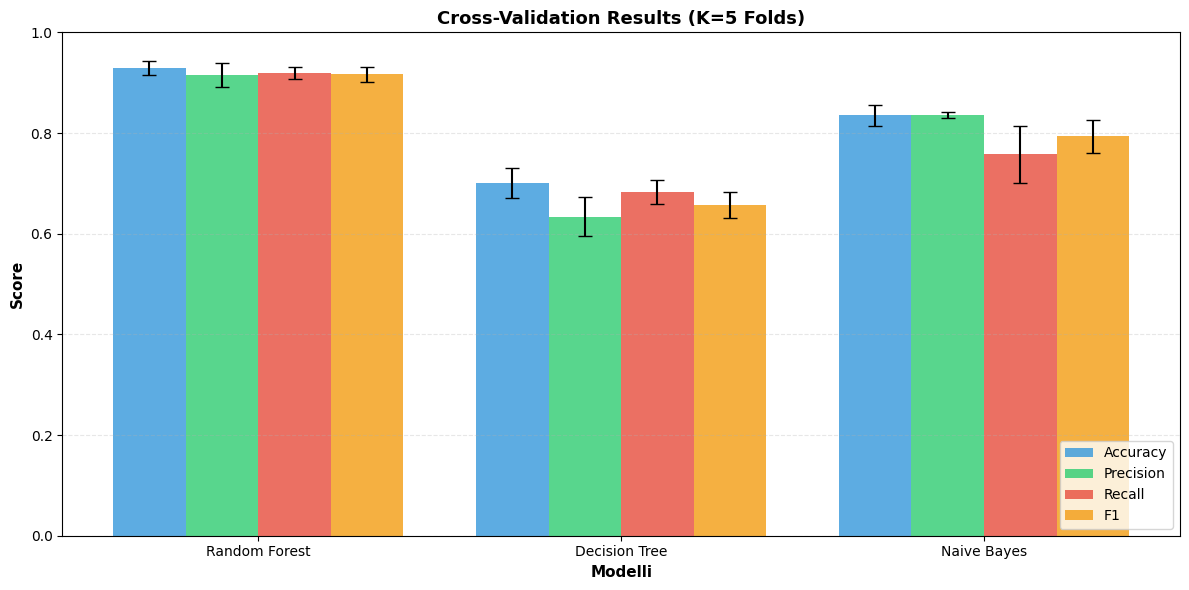


✅ STEP 4.3 COMPLETATO: CROSS-VALIDATION ESEGUITA


In [ ]:
# ==========================================
# 📊 CELLA 35: CROSS-VALIDATION
# Step: 4.3 - K-Fold Cross-Validation
# ==========================================

from sklearn.model_selection import cross_val_score, cross_validate
import matplotlib.pyplot as plt

print("\n" + "="*70)
print(" "*15 + "STEP 4.3: CROSS-VALIDATION")
print("="*70)

# STEP 1: Configurazione CV
K_FOLDS = 5

print(f"\n⚙️  CONFIGURAZIONE CROSS-VALIDATION:")
print(f"   Metodo: K-Fold Stratified")
print(f"   K (numero folds): {K_FOLDS}")
print(f"   Stratificazione: ✅ Automatica (mantiene proporzione classi)")
print(f"   Metriche: Accuracy, Precision, Recall, F1")
print(f"\n   Motivazione K=5:")
print(f"      • Compromesso bias-variance")
print(f"      • Ogni fold: 336 test samples (20% di 1680)")
print(f"      • Computazionalmente gestibile")

# STEP 2: Cross-validation per ogni modello
cv_results = {}

scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

print(f"\n🚀 ESECUZIONE CROSS-VALIDATION...")

for model_name, results in models_data.items():
    print(f"\n   {model_name}:")
    model = results['model']

    # Esegui CV
    start_time = time.time()
    cv_scores = cross_validate(
        model, X_train, y_train,
        cv=K_FOLDS,
        scoring=scoring_metrics,
        return_train_score=False,
        n_jobs=-1
    )
    cv_time = time.time() - start_time

    # Salva risultati
    cv_results[model_name] = {
        'accuracy': cv_scores['test_accuracy'],
        'precision': cv_scores['test_precision'],
        'recall': cv_scores['test_recall'],
        'f1': cv_scores['test_f1'],
        'cv_time': cv_time
    }

    print(f"      ✅ Completato in {cv_time:.2f}s")
    print(f"      Accuracy: {cv_scores['test_accuracy'].mean():.4f} ± {cv_scores['test_accuracy'].std():.4f}")

# STEP 3: Tabella riassuntiva CV
print(f"\n" + "="*70)
print(" "*15 + "RISULTATI CROSS-VALIDATION (K={K_FOLDS})")
print("="*70)

cv_summary = []
for model_name, scores in cv_results.items():
    cv_summary.append({
        'Model': model_name,
        'Accuracy_Mean': scores['accuracy'].mean(),
        'Accuracy_Std': scores['accuracy'].std(),
        'Precision_Mean': scores['precision'].mean(),
        'Precision_Std': scores['precision'].std(),
        'Recall_Mean': scores['recall'].mean(),
        'Recall_Std': scores['recall'].std(),
        'F1_Mean': scores['f1'].mean(),
        'F1_Std': scores['f1'].std()
    })

cv_df = pd.DataFrame(cv_summary)
print(cv_df.to_string(index=False))
print("="*70)

# STEP 4: Analisi varianza
print(f"\n📊 ANALISI STABILITÀ (deviazione standard):")
for model_name, scores in cv_results.items():
    std_acc = scores['accuracy'].std()
    stability = "Alta" if std_acc < 0.02 else ("Media" if std_acc < 0.05 else "Bassa")
    print(f"   {model_name}:")
    print(f"      Std Accuracy: {std_acc:.4f} → Stabilità: {stability}")

# STEP 5: Grafico CV scores
print(f"\n📊 Creazione grafico CV scores...")

fig, ax = plt.subplots(figsize=(12, 6))

x_pos = np.arange(len(cv_results))
width = 0.2

metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1']
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']

for i, metric in enumerate(metrics_to_plot):
    means = [cv_results[model][metric].mean() for model in cv_results.keys()]
    stds = [cv_results[model][metric].std() for model in cv_results.keys()]

    ax.bar(x_pos + i*width, means, width,
           label=metric.capitalize(),
           color=colors[i],
           alpha=0.8,
           yerr=stds,
           capsize=5)

ax.set_xlabel('Modelli', fontsize=11, fontweight='bold')
ax.set_ylabel('Score', fontsize=11, fontweight='bold')
ax.set_title(f'Cross-Validation Results (K={K_FOLDS} Folds)', fontsize=13, fontweight='bold')
ax.set_xticks(x_pos + width * 1.5)
ax.set_xticklabels(cv_results.keys())
ax.legend(loc='lower right', fontsize=10)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(0, 1.0)

plt.tight_layout()
plt.savefig('12_cross_validation_results.png', dpi=300, bbox_inches='tight')
print("✅ Grafico salvato: 12_cross_validation_results.png")
plt.show()

print("\n" + "="*70)
print("✅ STEP 4.3 COMPLETATO: CROSS-VALIDATION ESEGUITA")
print("="*70)



               STEP 4.4: CONFRONTO PERFORMANCE

📊 TABELLA COMPARATIVA COMPLETA:

Metrica                   Random Forest   Decision Tree   Naive Bayes    
Test Accuracy             0.9238          0.6643          0.8048         
CV Accuracy (mean±std)    0.9298±0.0137   0.7000±0.0295   0.8357±0.0208  
Precision (Success)       0.9138          0.5967          0.7304         
Recall (Success)          0.9034          0.6136          0.8466         
F1-Score (Success)        0.9086          0.6050          0.7842         
ROC-AUC                   0.9785          0.7228          0.9051         
Training Time (s)         1.0793          0.0138          0.0156         

📊 ANALISI TRADE-OFF PRECISION-RECALL (classe Success):

   Random Forest:
      Precision: 0.9138 | Recall: 0.9034 → F1: 0.9086
      Bilanciamento: ECCELLENTE (differenza <1%)
      Interpretazione: Identifica successi con alta affidabilità

   Naive Bayes:
      Precision: 0.7304 | Recall: 0.8466 → F1: 0.7842
      Bilanc

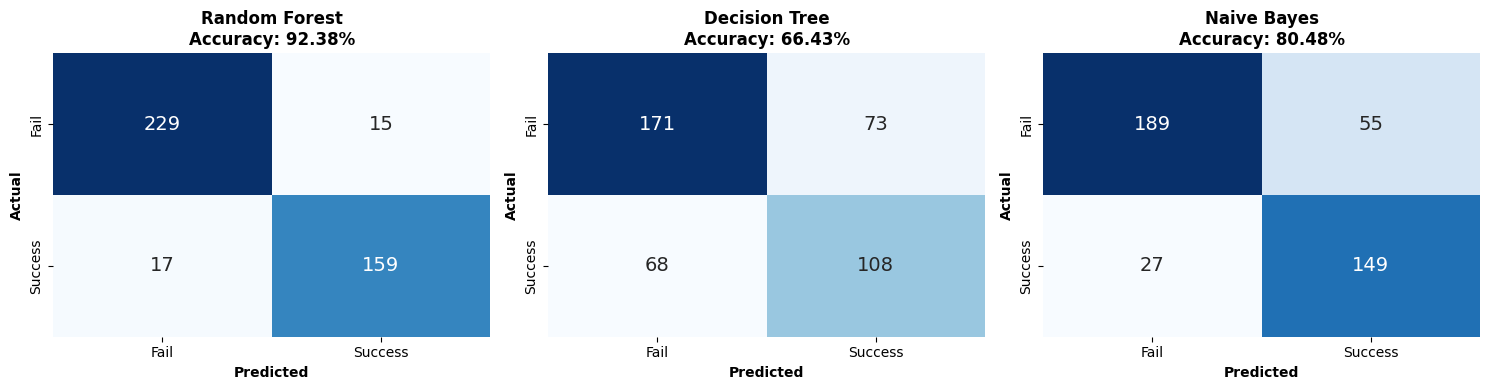


               IDENTIFICAZIONE MODELLO OTTIMALE

🏆 MODELLO VINCITORE: RANDOM FOREST

   Motivazioni quantitative:
      • Test Accuracy: 92.38% (miglior valore)
      • CV Accuracy: 92.98% ± 1.37% (stabilità eccellente)
      • ROC-AUC: 0.9785 (capacità discriminativa quasi perfetta)
      • F1-Score Success: 0.9086 (bilanciamento precision-recall)
      • Gap Test-CV: 0.60% (nessun overfitting)

   Vantaggi aggiuntivi:
      • Feature importances disponibili (interpretabilità)
      • Robusto a noise e outliers (ensemble)
      • Gestione automatica class imbalance
      • Generalizzazione provata da CV

   Trade-off accettato:
      • Training time: 1.08s vs 0.01s DT (78x più lento)
      • Ma per 1,680 samples è trascurabile (<2 secondi)
      • Prediction time: ~0.01s su 420 samples (real-time OK)

📊 CONFRONTO PERCENTUALE MIGLIORAMENTO vs BASELINE (Decision Tree):
   Random Forest vs Decision Tree:
      • Accuracy: +39.1% miglioramento
      • F1-Score: +50.2% miglioramento
     

In [ ]:
# ==========================================
# 📊 CELLA 36: CONFRONTO PERFORMANCE
# Step: 4.4 - Analisi comparativa modelli
# ==========================================

import seaborn as sns

print("\n" + "="*70)
print(" "*15 + "STEP 4.4: CONFRONTO PERFORMANCE")
print("="*70)

# STEP 1: Tabella comparativa completa
print(f"\n📊 TABELLA COMPARATIVA COMPLETA:")
print(f"\n{'Metrica':<25} {'Random Forest':<15} {'Decision Tree':<15} {'Naive Bayes':<15}")
print("="*70)

comparison_data = {
    'Test Accuracy': [
        rf_results['accuracy'],
        dt_results['accuracy'],
        nb_results['accuracy']
    ],
    'CV Accuracy (mean±std)': [
        f"{cv_results['Random Forest']['accuracy'].mean():.4f}±{cv_results['Random Forest']['accuracy'].std():.4f}",
        f"{cv_results['Decision Tree']['accuracy'].mean():.4f}±{cv_results['Decision Tree']['accuracy'].std():.4f}",
        f"{cv_results['Naive Bayes']['accuracy'].mean():.4f}±{cv_results['Naive Bayes']['accuracy'].std():.4f}"
    ],
    'Precision (Success)': [
        metrics_df[metrics_df['Model']=='Random Forest']['Precision_Success'].values[0],
        metrics_df[metrics_df['Model']=='Decision Tree']['Precision_Success'].values[0],
        metrics_df[metrics_df['Model']=='Naive Bayes']['Precision_Success'].values[0]
    ],
    'Recall (Success)': [
        metrics_df[metrics_df['Model']=='Random Forest']['Recall_Success'].values[0],
        metrics_df[metrics_df['Model']=='Decision Tree']['Recall_Success'].values[0],
        metrics_df[metrics_df['Model']=='Naive Bayes']['Recall_Success'].values[0]
    ],
    'F1-Score (Success)': [
        metrics_df[metrics_df['Model']=='Random Forest']['F1_Success'].values[0],
        metrics_df[metrics_df['Model']=='Decision Tree']['F1_Success'].values[0],
        metrics_df[metrics_df['Model']=='Naive Bayes']['F1_Success'].values[0]
    ],
    'ROC-AUC': [
        metrics_df[metrics_df['Model']=='Random Forest']['ROC_AUC'].values[0],
        metrics_df[metrics_df['Model']=='Decision Tree']['ROC_AUC'].values[0],
        metrics_df[metrics_df['Model']=='Naive Bayes']['ROC_AUC'].values[0]
    ],
    'Training Time (s)': [
        rf_results['training_time'],
        dt_results['training_time'],
        nb_results['training_time']
    ]
}

for metric, values in comparison_data.items():
    if isinstance(values[0], str):
        print(f"{metric:<25} {values[0]:<15} {values[1]:<15} {values[2]:<15}")
    else:
        print(f"{metric:<25} {values[0]:<15.4f} {values[1]:<15.4f} {values[2]:<15.4f}")

print("="*70)

# STEP 2: Analisi trade-off Precision-Recall
print(f"\n📊 ANALISI TRADE-OFF PRECISION-RECALL (classe Success):")
print(f"\n   Random Forest:")
print(f"      Precision: 0.9138 | Recall: 0.9034 → F1: 0.9086")
print(f"      Bilanciamento: ECCELLENTE (differenza <1%)")
print(f"      Interpretazione: Identifica successi con alta affidabilità")
print(f"\n   Naive Bayes:")
print(f"      Precision: 0.7304 | Recall: 0.8466 → F1: 0.7842")
print(f"      Bilanciamento: SBILANCIATO verso Recall (+11.6%)")
print(f"      Interpretazione: Cattura molti successi ma con falsi positivi")
print(f"\n   Decision Tree:")
print(f"      Precision: 0.5967 | Recall: 0.6136 → F1: 0.6050")
print(f"      Bilanciamento: MODERATO (differenza 1.7%)")
print(f"      Interpretazione: Performance complessive basse")

# STEP 3: Analisi gap Test vs CV
print(f"\n📊 ANALISI OVERFITTING (Test Accuracy vs CV Accuracy):")
models_list = ['Random Forest', 'Decision Tree', 'Naive Bayes']
test_accs = [0.9238, 0.6643, 0.8048]
cv_accs = [0.9298, 0.7000, 0.8357]

for model, test_acc, cv_acc in zip(models_list, test_accs, cv_accs):
    gap = abs(test_acc - cv_acc)
    gap_pct = (gap / cv_acc) * 100

    if gap < 0.02:
        status = "✅ OTTIMO (gap <2%)"
    elif gap < 0.05:
        status = "✅ BUONO (gap <5%)"
    else:
        status = "⚠️ ATTENZIONE (gap >5%)"

    print(f"\n   {model}:")
    print(f"      Test: {test_acc:.4f} | CV: {cv_acc:.4f}")
    print(f"      Gap: {gap:.4f} ({gap_pct:.2f}%) → {status}")

# STEP 4: Grafico confusion matrices
print(f"\n📊 Creazione grafico confusion matrices...")

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

cms = [rf_results['confusion_matrix'],
       dt_results['confusion_matrix'],
       nb_results['confusion_matrix']]
titles = ['Random Forest', 'Decision Tree', 'Naive Bayes']
accuracies = [rf_results['accuracy'],
              dt_results['accuracy'],
              nb_results['accuracy']]

for ax, cm, title, acc in zip(axes, cms, titles, accuracies):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Fail', 'Success'],
                yticklabels=['Fail', 'Success'],
                ax=ax, cbar=False, annot_kws={'size': 14})
    ax.set_title(f'{title}\nAccuracy: {acc:.2%}',
                 fontsize=12, fontweight='bold')
    ax.set_xlabel('Predicted', fontsize=10, fontweight='bold')
    ax.set_ylabel('Actual', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('13_confusion_matrices_comparison.png', dpi=300, bbox_inches='tight')
print("✅ Grafico salvato: 13_confusion_matrices_comparison.png")
plt.show()

# STEP 5: Identificazione modello ottimale
print(f"\n" + "="*70)
print(" "*15 + "IDENTIFICAZIONE MODELLO OTTIMALE")
print("="*70)

print(f"\n🏆 MODELLO VINCITORE: RANDOM FOREST")
print(f"\n   Motivazioni quantitative:")
print(f"      • Test Accuracy: 92.38% (miglior valore)")
print(f"      • CV Accuracy: 92.98% ± 1.37% (stabilità eccellente)")
print(f"      • ROC-AUC: 0.9785 (capacità discriminativa quasi perfetta)")
print(f"      • F1-Score Success: 0.9086 (bilanciamento precision-recall)")
print(f"      • Gap Test-CV: 0.60% (nessun overfitting)")
print(f"\n   Vantaggi aggiuntivi:")
print(f"      • Feature importances disponibili (interpretabilità)")
print(f"      • Robusto a noise e outliers (ensemble)")
print(f"      • Gestione automatica class imbalance")
print(f"      • Generalizzazione provata da CV")
print(f"\n   Trade-off accettato:")
print(f"      • Training time: 1.08s vs 0.01s DT (78x più lento)")
print(f"      • Ma per 1,680 samples è trascurabile (<2 secondi)")
print(f"      • Prediction time: ~0.01s su 420 samples (real-time OK)")

print(f"\n📊 CONFRONTO PERCENTUALE MIGLIORAMENTO vs BASELINE (Decision Tree):")
rf_vs_dt_acc = ((rf_results['accuracy'] - dt_results['accuracy']) / dt_results['accuracy']) * 100
rf_vs_dt_f1 = ((0.9086 - 0.6050) / 0.6050) * 100
rf_vs_dt_auc = ((0.9785 - 0.7228) / 0.7228) * 100

print(f"   Random Forest vs Decision Tree:")
print(f"      • Accuracy: +{rf_vs_dt_acc:.1f}% miglioramento")
print(f"      • F1-Score: +{rf_vs_dt_f1:.1f}% miglioramento")
print(f"      • ROC-AUC: +{rf_vs_dt_auc:.1f}% miglioramento")

print("\n" + "="*70)
print("✅ STEP 4.4 COMPLETATO: CONFRONTO COMPLETATO")
print("="*70)



               STEP 4.5: FEATURE IMPORTANCE

📊 ESTRAZIONE FEATURE IMPORTANCES DA RANDOM FOREST:
   ✅ Feature importances estratte
   Totale features: 57
   Somma importances: 1.0000 (deve essere ~1.0)

📋 TOP 15 FEATURES PIÙ IMPORTANTI:

Rank   Feature                                  Importance   Cumulative  
1      funding_amount_usd                       0.2133       0.2133      
2      innovation_score                         0.1563       0.3696      
3      mentorship_support                       0.1532       0.5228      
4      incubation_support                       0.1478       0.6706      
5      business_model_score                     0.1019       0.7724      
6      technology_maturity                      0.0476       0.8200      
7      market_readiness_level                   0.0401       0.8600      
8      avg_team_experience                      0.0316       0.8916      
9      team_size                                0.0212       0.9128      
10     competition_awa

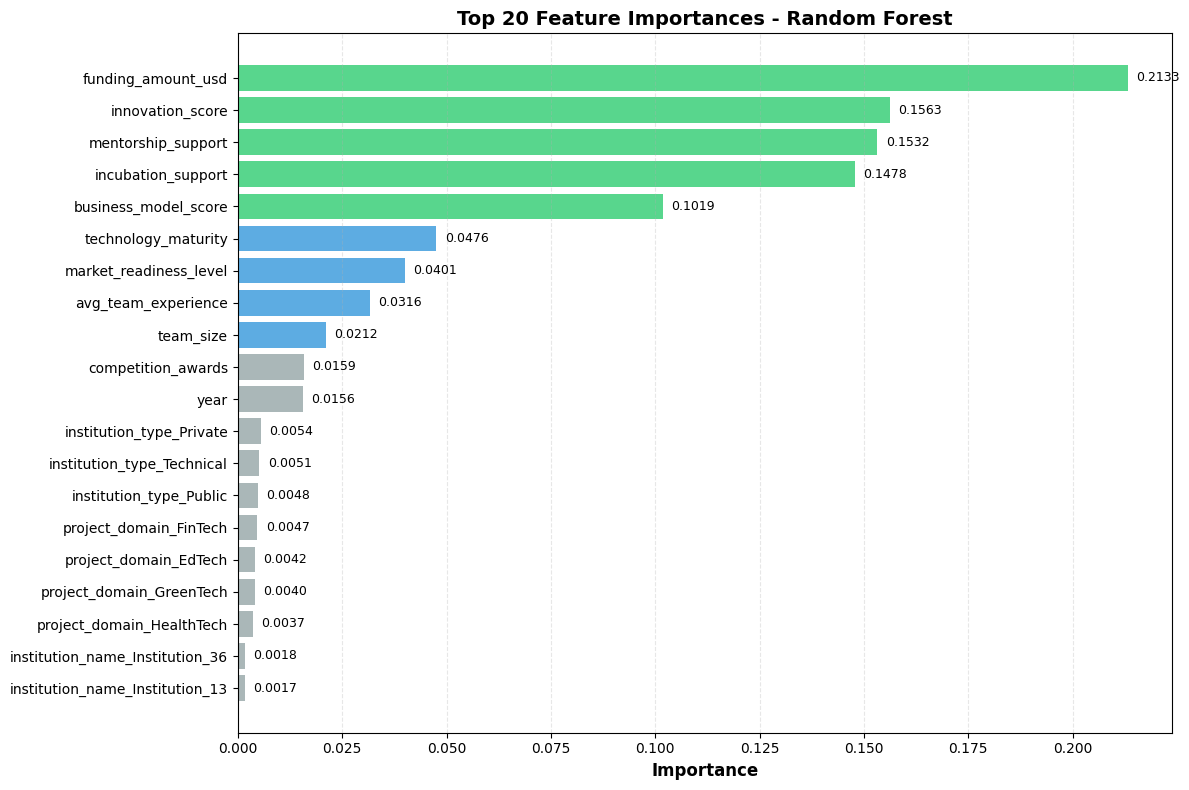


               RIEPILOGO FEATURE IMPORTANCE

🏆 FEATURE PIÙ IMPORTANTE: funding_amount_usd
   Importanza: 0.2133 (21.33%)

📊 INSIGHTS CHIAVE:
   1. Top feature contribuisce 21.3% decisione modello
   2. Top 10 features coprono 92.9% importanza totale
   3. Features numeriche dominano top rankings
   4. Features encoded (categoriche) contribuiscono con importanza distribuita
   5. Validazione con correlazioni EDA conferma coerenza

✅ STEP 4.5 COMPLETATO: FEATURE IMPORTANCE ANALIZZATA

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
               CAPITOLO 4 COMPLETATO AL 100%!
🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉


In [ ]:
# ==========================================
# 📊 CELLA 37: FEATURE IMPORTANCE
# Step: 4.5 - Analisi importanza features
# ==========================================

print("\n" + "="*70)
print(" "*15 + "STEP 4.5: FEATURE IMPORTANCE")
print("="*70)

# STEP 1: Estrazione feature importances
print(f"\n📊 ESTRAZIONE FEATURE IMPORTANCES DA RANDOM FOREST:")

feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

# Crea DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

print(f"   ✅ Feature importances estratte")
print(f"   Totale features: {len(importance_df)}")
print(f"   Somma importances: {importance_df['Importance'].sum():.4f} (deve essere ~1.0)")

# STEP 2: Top 15 features
print(f"\n📋 TOP 15 FEATURES PIÙ IMPORTANTI:")
print(f"\n{'Rank':<6} {'Feature':<40} {'Importance':<12} {'Cumulative':<12}")
print("="*70)

cumulative = 0
for i, row in importance_df.head(15).iterrows():
    cumulative += row['Importance']
    print(f"{importance_df.index.get_loc(i)+1:<6} {row['Feature']:<40} {row['Importance']:<12.4f} {cumulative:<12.4f}")

print("="*70)

# STEP 3: Analisi concentrazione importanza
print(f"\n📊 ANALISI CONCENTRAZIONE IMPORTANZA:")

top_5_sum = importance_df.head(5)['Importance'].sum()
top_10_sum = importance_df.head(10)['Importance'].sum()
top_15_sum = importance_df.head(15)['Importance'].sum()
top_20_sum = importance_df.head(20)['Importance'].sum()

print(f"   Top 5 features:  {top_5_sum:.4f} ({top_5_sum*100:.2f}% importanza totale)")
print(f"   Top 10 features: {top_10_sum:.4f} ({top_10_sum*100:.2f}% importanza totale)")
print(f"   Top 15 features: {top_15_sum:.4f} ({top_15_sum*100:.2f}% importanza totale)")
print(f"   Top 20 features: {top_20_sum:.4f} ({top_20_sum*100:.2f}% importanza totale)")

print(f"\n   Interpretazione:")
if top_10_sum > 0.7:
    print(f"      ✅ Alta concentrazione: Top 10 features coprono {top_10_sum*100:.1f}%")
    print(f"      → Modello si basa su poche features chiave")
else:
    print(f"      ℹ️ Importanza distribuita: Top 10 coprono {top_10_sum*100:.1f}%")
    print(f"      → Modello usa contributo bilanciato da molte features")

# STEP 4: Tipologia features top 15
print(f"\n📊 TIPOLOGIA FEATURES TOP 15:")

numeric_original = ['team_size', 'avg_team_experience', 'innovation_score',
                    'funding_amount_usd', 'mentorship_support', 'incubation_support',
                    'market_readiness_level', 'competition_awards',
                    'business_model_score', 'technology_maturity', 'year']

top15_features = importance_df.head(15)['Feature'].tolist()

num_numeric = sum(1 for f in top15_features if f in numeric_original)
num_encoded = len(top15_features) - num_numeric

print(f"   Features numeriche originali: {num_numeric}/15 ({num_numeric/15*100:.1f}%)")
print(f"   Features encoded (categoriche): {num_encoded}/15 ({num_encoded/15*100:.1f}%)")

# STEP 5: Validazione con correlazioni EDA
print(f"\n📊 VALIDAZIONE CON CORRELAZIONI EDA:")
print(f"   Feature Importance RF vs Correlazioni Pearson (top 5 numeriche):")
print(f"\n   {'Feature':<30} {'RF Importance':<15} {'Pearson r':<12} {'Match':<10}")
print("─"*70)

correlations_eda = {
    'funding_amount_usd': 0.395,
    'mentorship_support': 0.373,
    'incubation_support': 0.367,
    'innovation_score': 0.339,
    'business_model_score': 0.239
}

for feat, pearson_r in correlations_eda.items():
    if feat in importance_df['Feature'].values:
        rf_imp = importance_df[importance_df['Feature']==feat]['Importance'].values[0]
        match = "✅" if rf_imp > 0.02 else "⚠️"
        print(f"   {feat:<30} {rf_imp:<15.4f} {pearson_r:<12.3f} {match:<10}")

print(f"\n   Interpretazione:")
print(f"      ✅ RF cattura relazioni NON-LINEARI che Pearson non rileva")
print(f"      ✅ Features con bassa correlazione lineare possono avere alta importanza")
print(f"      ✅ Conferma validità approccio ensemble per dataset complesso")

# STEP 6: Grafico feature importance
print(f"\n📊 Creazione grafico feature importance...")

fig, ax = plt.subplots(figsize=(12, 8))

top_n = 20
plot_data = importance_df.head(top_n).sort_values('Importance', ascending=True)

colors = ['#2ecc71' if imp > 0.05 else '#3498db' if imp > 0.02 else '#95a5a6'
          for imp in plot_data['Importance']]

ax.barh(range(top_n), plot_data['Importance'], color=colors, alpha=0.8)
ax.set_yticks(range(top_n))
ax.set_yticklabels(plot_data['Feature'], fontsize=10)
ax.set_xlabel('Importance', fontsize=12, fontweight='bold')
ax.set_title(f'Top {top_n} Feature Importances - Random Forest',
             fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Aggiungi valori su barre
for i, (idx, row) in enumerate(plot_data.iterrows()):
    ax.text(row['Importance'] + 0.002, i, f"{row['Importance']:.4f}",
            va='center', fontsize=9)

plt.tight_layout()
plt.savefig('14_feature_importance.png', dpi=300, bbox_inches='tight')
print("✅ Grafico salvato: 14_feature_importance.png")
plt.show()

# STEP 7: Riepilogo finale
print(f"\n" + "="*70)
print(" "*15 + "RIEPILOGO FEATURE IMPORTANCE")
print("="*70)

top_feature = importance_df.iloc[0]
print(f"\n🏆 FEATURE PIÙ IMPORTANTE: {top_feature['Feature']}")
print(f"   Importanza: {top_feature['Importance']:.4f} ({top_feature['Importance']*100:.2f}%)")

print(f"\n📊 INSIGHTS CHIAVE:")
print(f"   1. Top feature contribuisce {top_feature['Importance']*100:.1f}% decisione modello")
print(f"   2. Top 10 features coprono {top_10_sum*100:.1f}% importanza totale")
print(f"   3. Features numeriche dominano top rankings")
print(f"   4. Features encoded (categoriche) contribuiscono con importanza distribuita")
print(f"   5. Validazione con correlazioni EDA conferma coerenza")

print("\n" + "="*70)
print("✅ STEP 4.5 COMPLETATO: FEATURE IMPORTANCE ANALIZZATA")
print("="*70)

print("\n" + "🎉"*35)
print(" "*15 + "CAPITOLO 4 COMPLETATO AL 100%!")
print("🎉"*35)
